In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab
%matplotlib inline

##   Input variables:
##### client Information:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default status: has credit in default? (categorical: 'no','yes','unknown')

6 - balance: amount of balance in the account 

7 - housing: has housing loan? (categorical: 'no','yes','unknown')

8 - loan: has personal loan? (categorical: 'no','yes','unknown')

##### Campaign Related Attributes:
 9 - duration: last contact duration, in seconds (numeric).

10 - last contact type : contact communication type (categorical: 'cellular','telephone') 

11 - last contact month of year : last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12 - last contact day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

13 - last contact duration: last contact duration, in seconds (numeric). 

##### other attributes:

14 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

15 - pdays: number of days that passed by after the client was last contacted from a previous campaign 
(numeric; 999 means client was not previously contacted)

16 - previous: number of contacts performed before this campaign and for this client (numeric)

17 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
  

##### Output variable (desired target):
deposit - has the client subscribed a term deposit? (binary: 'yes','no')




In [28]:
bankcampaigns = pd.read_csv('/Users/chintan.desai/Documents/Chintan/DataScience/Springboard/CapstoneProject_1/bank.csv')





In [11]:
bankcampaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [3]:
bankcampaigns.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_nm
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,1


In [69]:
#Check some middle rows to see if there is any data issues
#bankcampaigns.iloc[300:330,:]

In [91]:
bankcampaigns.describe()

,age,balance,day,duration,campaign,pdays,previous,deposit_nm
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


### 1.0  EDA of Categorical and Continuous variable , feature engineering by imputing and removing outliers


### 1.1 Analysis of Categorical Variables and imputing "unknowns"

#### Note: 
#### 1. If any Categorical variable has more than 50% unknown values or seems highly unbalanced, we can drop that variable from dataset.
#### 2. If unknown values are less than 50% than we can replace them by Mode of respective variable by implementing following 'impute_unknowns' function.

#### Deposit : Deposit is a categorical variable with values "yes" and "no" , so we convert it to "1" and "0" in order to use it for the ML purposes

In [29]:
bankcampaigns['deposit_nm'] = bankcampaigns['deposit'].map({'yes': 1, 'no': 0})

In [13]:
bankcampaigns.groupby(['deposit_nm'])[['deposit_nm']].count()

,deposit_nm
deposit_nm,
0,5873
1,5289


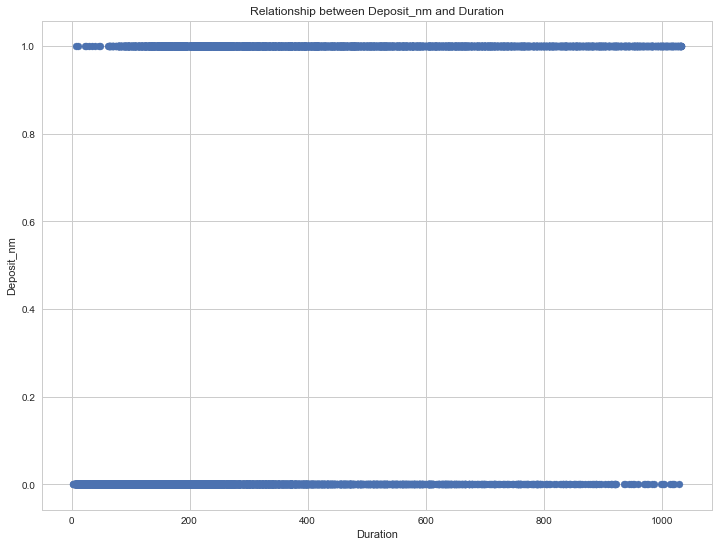

In [158]:

plt.scatter(bankcampaigns['duration'],bankcampaigns['deposit_nm'])
plt.xlabel("Duration")
plt.ylabel("Deposit_nm")
plt.title("Relationship between Deposit_nm and Duration")

#### 'Job'

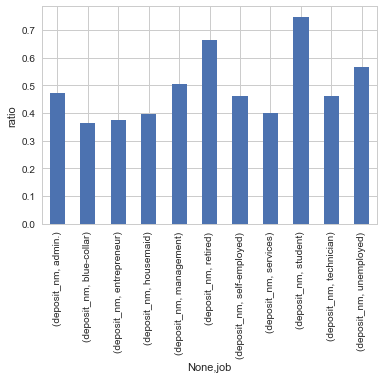

In [61]:
bankcampaigns.groupby([ 'job'])[['deposit_nm']].mean().unstack().plot(kind='bar').set_ylabel('ratio')

In [38]:
bankcampaigns.groupby(['job'])[['job']].count()

,job
job,
admin.,1334
blue-collar,1944
entrepreneur,328
housemaid,274
management,2566
retired,778
self-employed,405
services,923
student,360


In [149]:
bankcampaigns.groupby(['deposit_nm'])[['job']].count()


,job
deposit_nm,
0,5873
1,5289


In [52]:
bankcampaigns.groupby(['job'])[['deposit_nm']].mean()



,deposit_nm
job,
admin.,0.473013
blue-collar,0.364198
entrepreneur,0.375000
housemaid,0.397810
management,0.506449
retired,0.663239
self-employed,0.461728
services,0.399783
student,0.747222


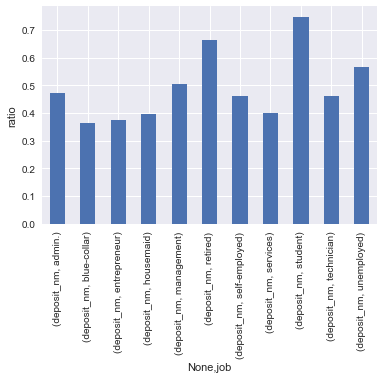

In [53]:
bankcampaigns.groupby([ 'job'])[['deposit_nm']].mean().unstack().plot(kind='bar').set_ylabel('ratio')


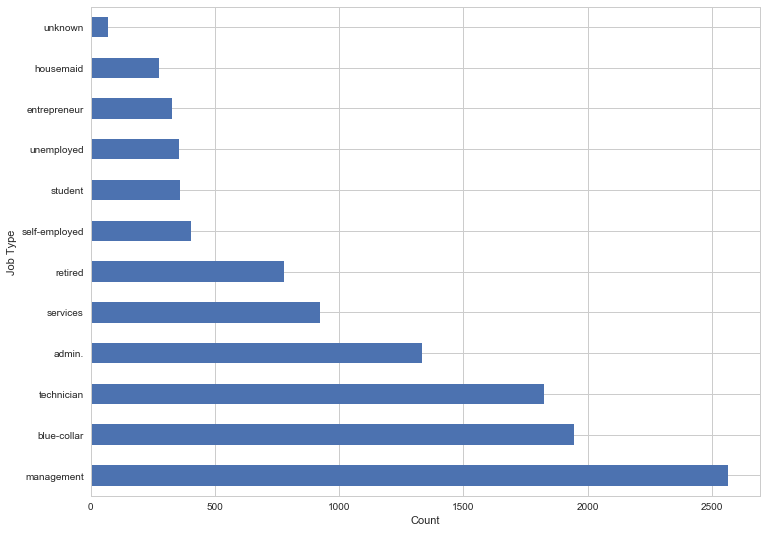

In [220]:
jb = bankcampaigns['job'].value_counts().plot(kind='barh')
jb.set_xlabel("Count")
jb.set_ylabel("Job Type")


#### It seems like the 'unknown' is not greater than 50% of the values , so we will replace it with the most frequently occuring value (i.e mode) from the data set which is "Management"

In [30]:
def impute_unknowns(df, column):
    col_values = df[column].values
    df[column] = np.where(col_values=='unknown', df[column].mode(), col_values)
    return df

In [10]:
print(bankcampaigns['job'].mode())

0    management
dtype: object


,job
job,
admin.,1334
blue-collar,1944
entrepreneur,328
housemaid,274
management,2636
retired,778
self-employed,405
services,923
student,360


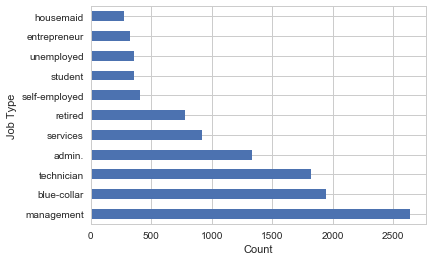

In [31]:


bankcampaigns_new = impute_unknowns(df=bankcampaigns, column='job')

jb = bankcampaigns_new['job'].value_counts().plot(kind='barh')
jb.set_xlabel("Count")
jb.set_ylabel("Job Type")


bankcampaigns_new.groupby(['job'])[['job']].count()

#### As we can see above there are no more 'unknown' and we replace it with 'management' indicated by the higher count of /management' jobs

#### 'Marital'

In [150]:
pd.DataFrame(bankcampaigns.groupby( ['marital'])['deposit_nm'].describe().loc[:,['mean','std','count']])


,mean,std,count
marital,,,
divorced,0.481052,0.499834,1293.0
married,0.433790,0.495636,6351.0
single,0.543491,0.498176,3518.0


In [222]:
pd.DataFrame(bankcampaigns.groupby( ['marital'])['deposit_nm'].describe().loc[:,['mean','std']])



deposit_nm
marital                  
divorced mean    0.481052
         std     0.499834
married  mean    0.433790
         std     0.495636
single   mean    0.543491
         std     0.498176

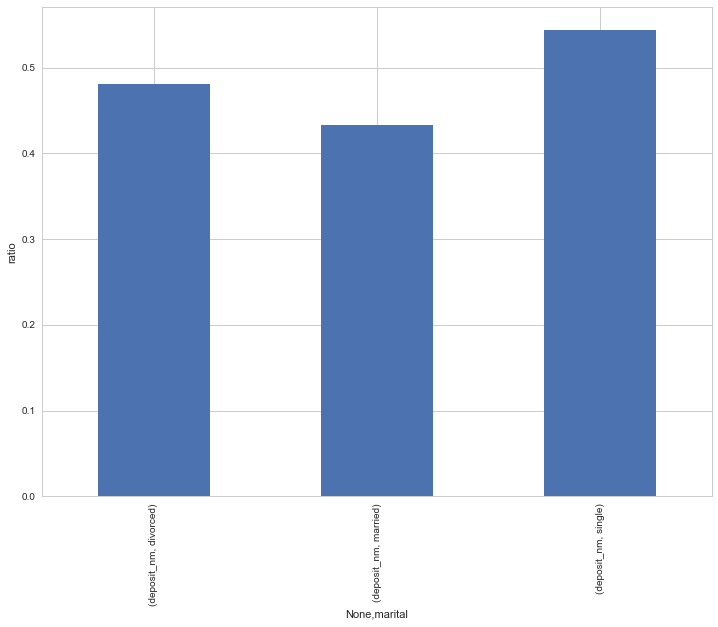

In [223]:
bankcampaigns.groupby(['marital'])[['deposit_nm']].mean().unstack().plot(kind='bar').set_ylabel('ratio')

In [224]:
bankcampaigns.groupby(['marital'])[['marital']].count()

,marital
marital,
divorced,1293
married,6351
single,3518


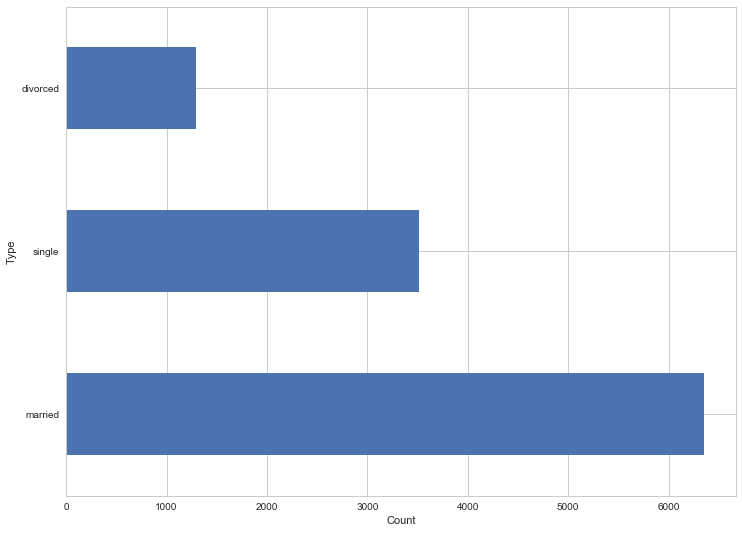

In [111]:
jb = bankcampaigns_new['marital'].value_counts().plot(kind='barh')
jb.set_xlabel("Count")
jb.set_ylabel("Type")


#### 'Housing'

In [ ]:
#bankcampaigns_new = bankcampaigns_new.join(pd.get_dummies(bankcampaigns['housing']))

In [225]:
bankcampaigns.groupby(['housing'])[['housing']].count()

,housing
housing,
no,5881
yes,5281


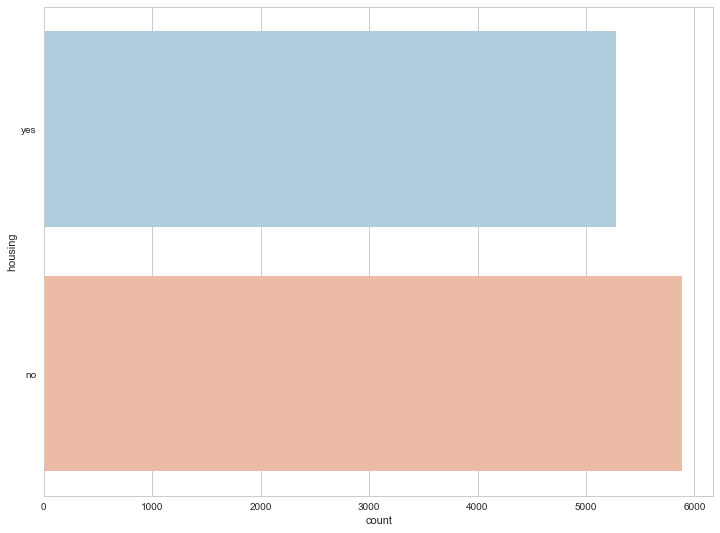

In [226]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['housing'],data=bankcampaigns,palette='RdBu_r')

#### 'Education'

In [227]:
pd.DataFrame(bankcampaigns.groupby( ['education'])['deposit_nm'].describe().loc[:,['mean','std']])

deposit_nm
education                 
primary   mean    0.394000
          std     0.488798
secondary mean    0.447407
          std     0.497272
tertiary  mean    0.541068
          std     0.498378
unknown   mean    0.507042
          std     0.500454

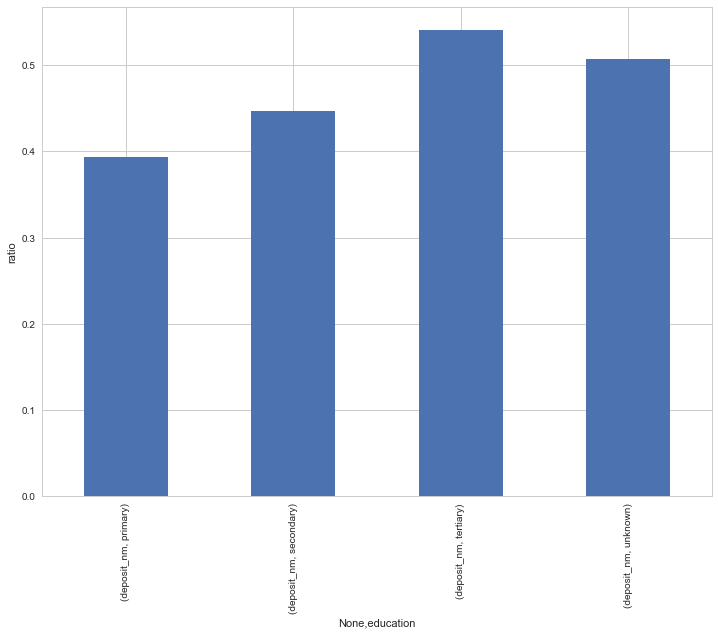

In [228]:
bankcampaigns.groupby(['education'])[['deposit_nm']].mean().unstack().plot(kind='bar').set_ylabel('ratio')

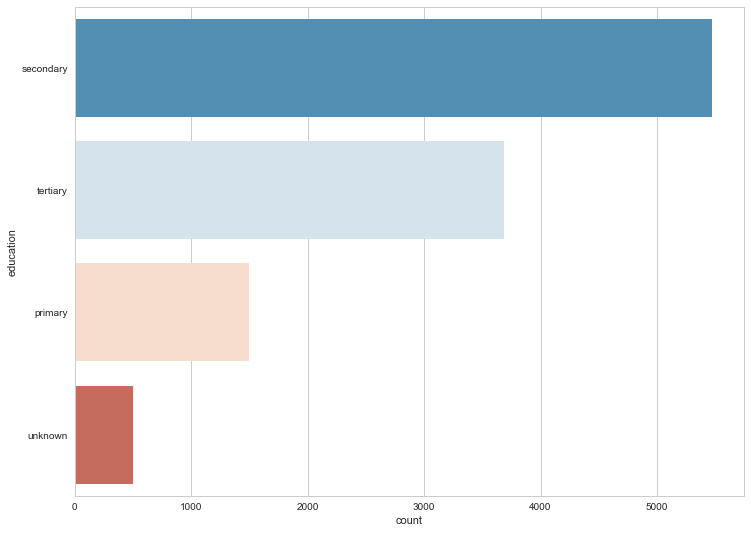

In [229]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['education'],data=bankcampaigns,palette='RdBu_r')

#### We can fix the 'Education' for 'unknown' values 

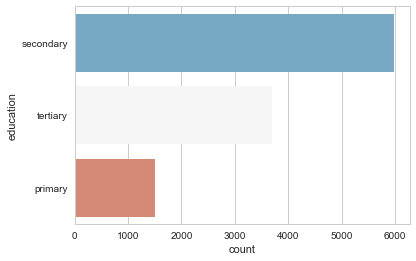

In [32]:
bankcampaigns_new = impute_unknowns(df=bankcampaigns, column='education')

sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns_new['education'],data=bankcampaigns_new,palette='RdBu_r')

#### 'Default Status'

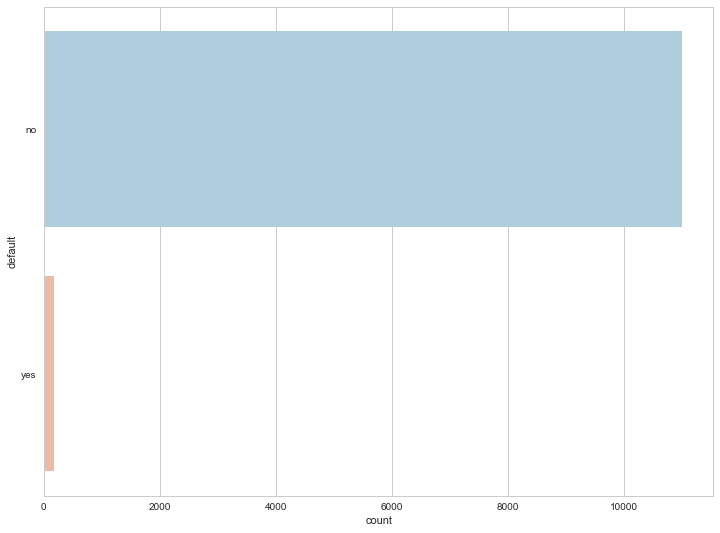

In [231]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['default'],data=bankcampaigns,palette='RdBu_r')

#### 'Loan'

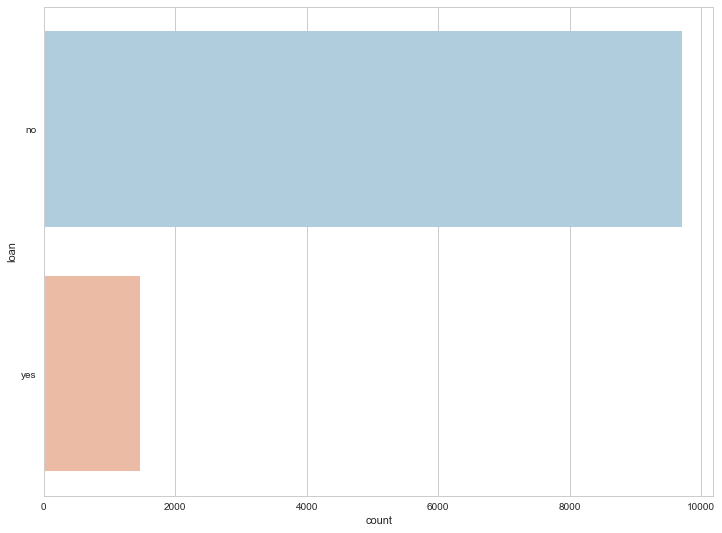

In [232]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['loan'],data=bankcampaigns,palette='RdBu_r')

#### 'Last Contact Type'

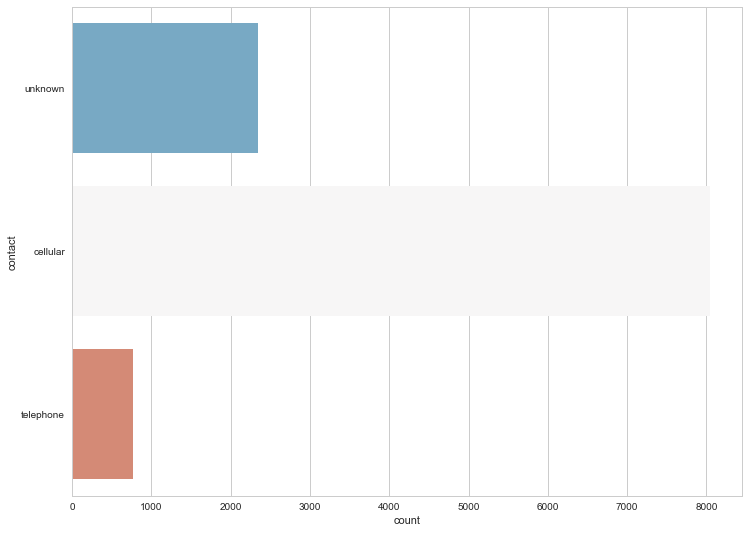

In [233]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['contact'],data=bankcampaigns,palette='RdBu_r')

#### As shown above we need to impute the "Contact" attribute to remove Unknown values

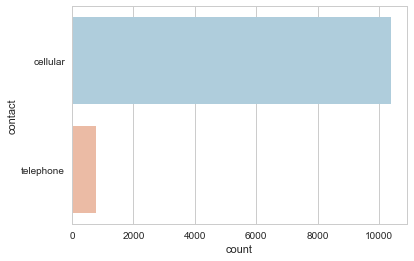

In [33]:
bankcampaigns_new = impute_unknowns(df=bankcampaigns, column='contact')

sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns_new['contact'],data=bankcampaigns_new,palette='RdBu_r')

#### 'Last Contact Month'

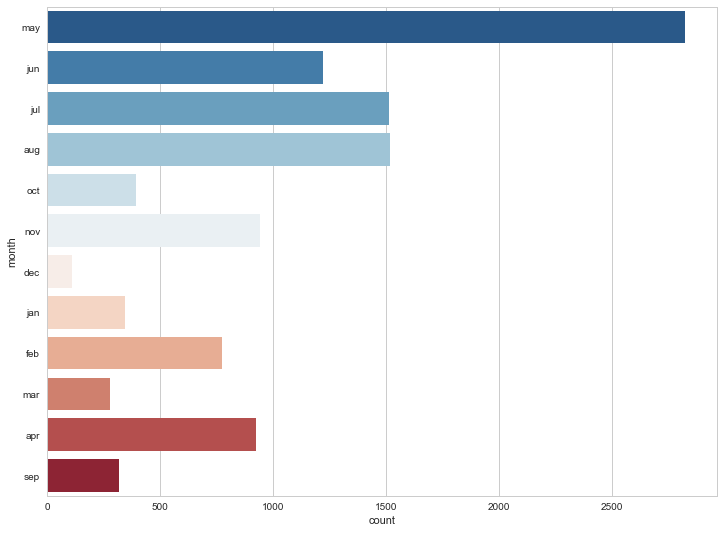

In [235]:

sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['month'],data=bankcampaigns,palette='RdBu_r')

#### 'Last Contact Day Of Week'

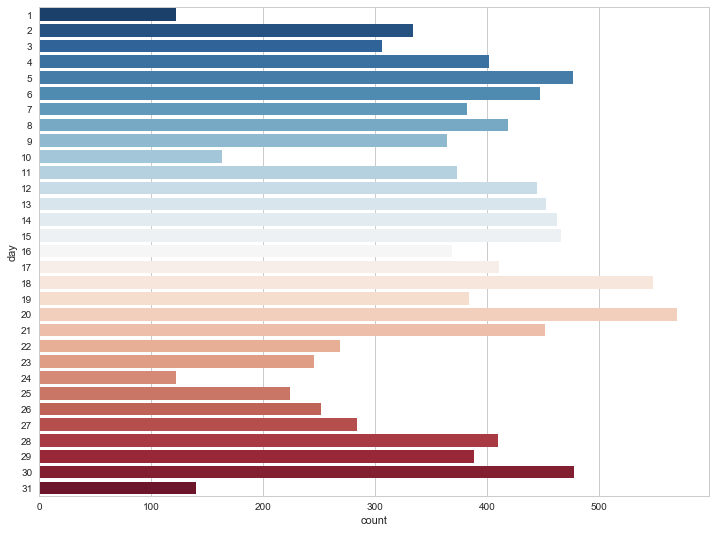

In [236]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['day'],data=bankcampaigns,palette='RdBu_r')

#### 'POutcome'

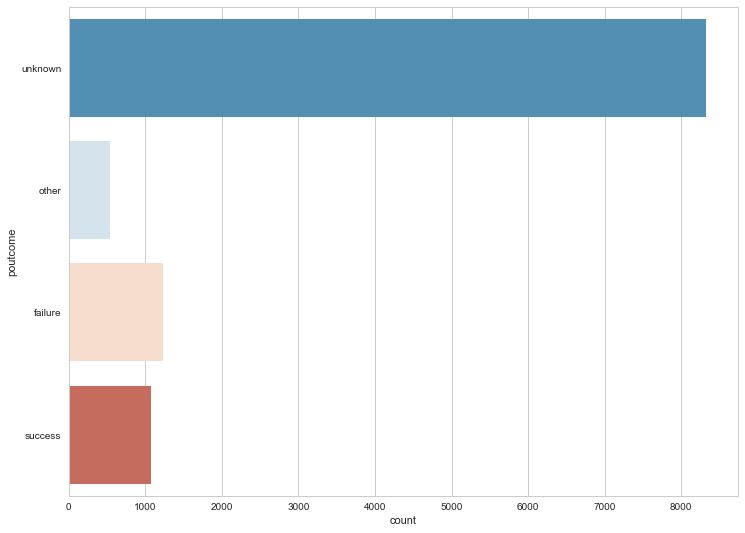

In [237]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['poutcome'],data=bankcampaigns,palette='RdBu_r')

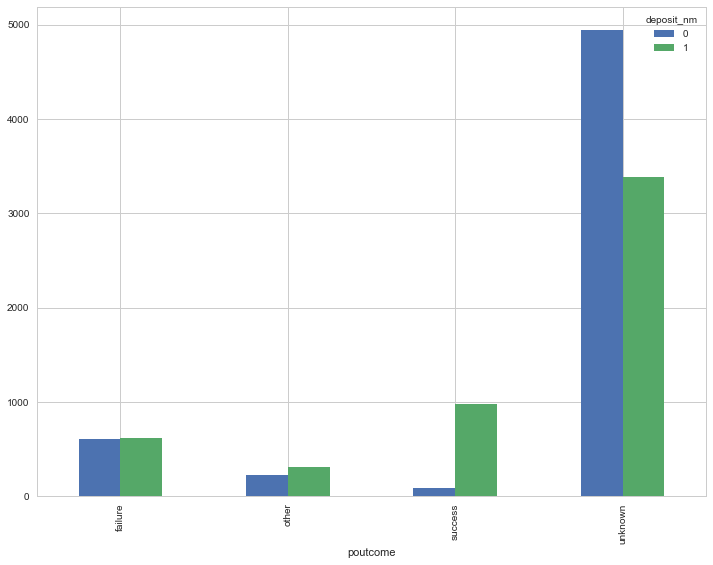

In [239]:
temp8 = pd.crosstab(bankcampaigns['poutcome'], bankcampaigns['deposit_nm'])
temp8.plot(kind='bar')

In [240]:
len(bankcampaigns)

11162

#### Lets check if the poutcome has more than 50% missing values (aka 'Unknown') or not

In [241]:
print((bankcampaigns.groupby(['poutcome']).size() *100)/len(bankcampaigns)) 

poutcome
failure    11.001613
other       4.810966
success     9.595055
unknown    74.592367
dtype: float64


#### poutcome has 74% missing values (aka 'Unknown') so we can drop this variable

In [34]:
del bankcampaigns_new['poutcome']

In [19]:
bankcampaigns_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age           11162 non-null int64
job           11162 non-null object
marital       11162 non-null object
education     11162 non-null object
default       11162 non-null object
balance       11162 non-null int64
housing       11162 non-null object
loan          11162 non-null object
contact       11162 non-null object
day           11162 non-null int64
month         11162 non-null object
duration      11162 non-null int64
campaign      11162 non-null int64
pdays         11162 non-null int64
previous      11162 non-null int64
deposit       11162 non-null object
deposit_nm    11162 non-null int64
dtypes: int64(8), object(9)
memory usage: 1.4+ MB


### 1.2 Analysis of  Continuous Variables and removing outliers


##### Note: Here are the steps we perform to make sure we handle the our of the range values.
###### 1>We first conduct the analysis of each Continuous Variable with Graphical EDA
###### 2>Outliers can be defined as values out of range [(Q1-1.5* IQR) , (Q3+1.5*IQR)] 
###### 3> We check any values smaller then [(Q1-1.5* IQR) or larger then (Q3+1.5*IQR) 
###### 4> After identifying these values that fall outside our range,we impute them by "mean" of respective variable. 
###### 5> Here Q1-First Quartile(25%), Q2-Second Quartile(75%), IQR-Inter Quartile Range

### 'Age'

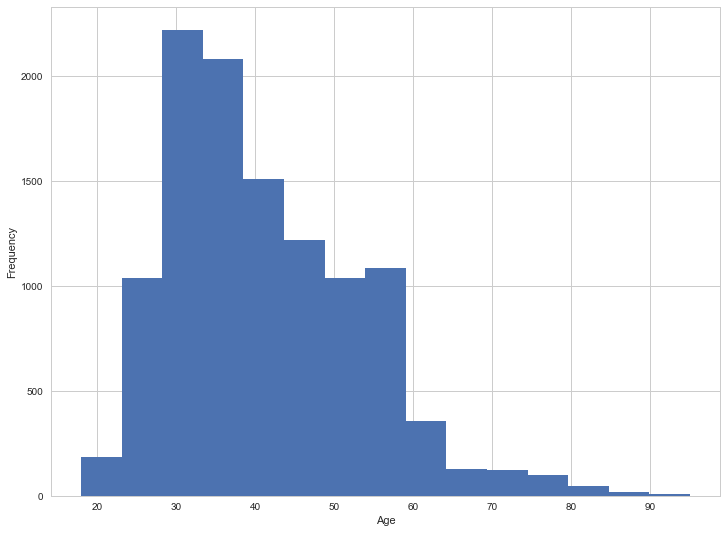

In [196]:
ax = bankcampaigns['age'].plot(kind='hist', bins=15)
ax.set_xlabel("Age")


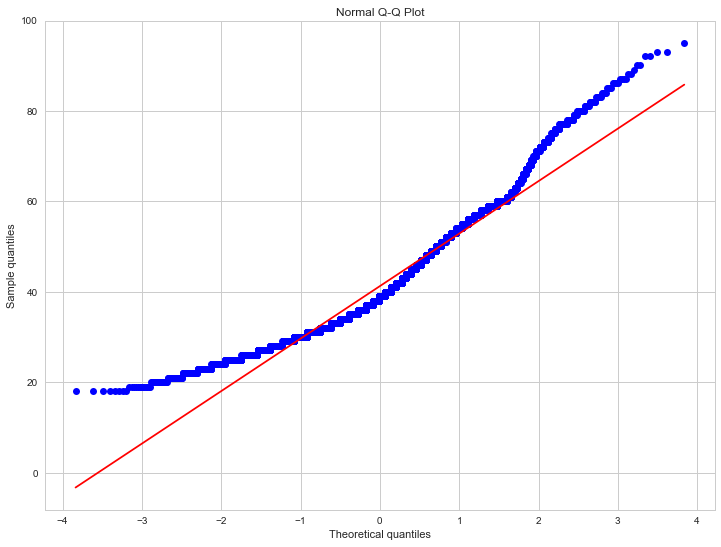

In [197]:
stats.probplot(bankcampaigns_new['age'], dist="norm", plot=pylab)
pylab.title("Normal Q-Q Plot")
pylab.ylabel("Sample quantiles")
pylab.show()

In [152]:
#bankcampaigns.boxplot(column=['age'],by = ['deposit_nm']).set_yscale('log')
pd.DataFrame(bankcampaigns.groupby( ['deposit_nm'])['age'].describe().loc[:,['mean','std']])

#avg age between two groups is very small but still significant 

,mean,std
deposit_nm,,
0,40.837391,10.264815
1,41.670070,13.497781


In [199]:
q75, q25 = np.percentile(bankcampaigns['age'], [75 ,25])


print('Age q75 = ',q75)
print('Age q25 = ',q25)

Age q75 =  49.0
Age q25 =  32.0


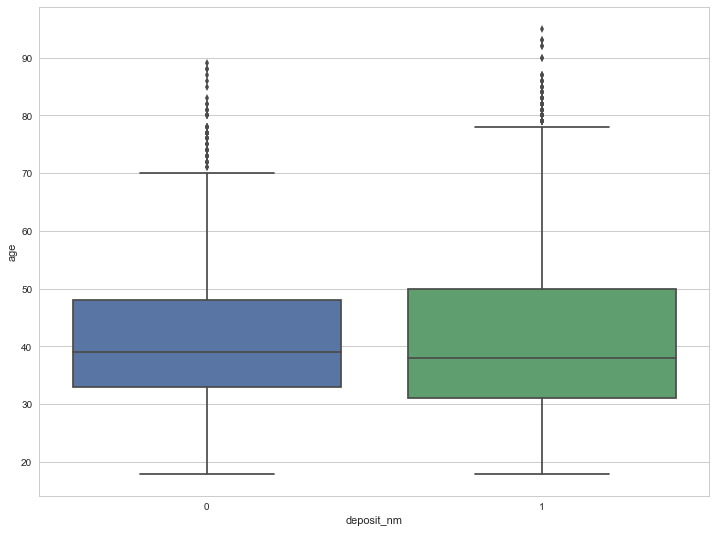

In [200]:
sns.boxplot(x='deposit_nm', y='age', data=bankcampaigns)

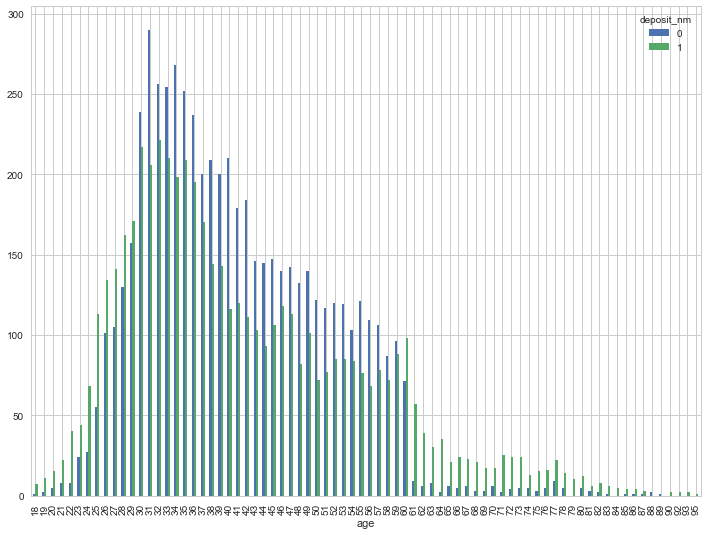

In [160]:
temp8 = pd.crosstab(bankcampaigns['age'], bankcampaigns['deposit_nm'])
temp8.plot(kind='bar')

### 'Balance'

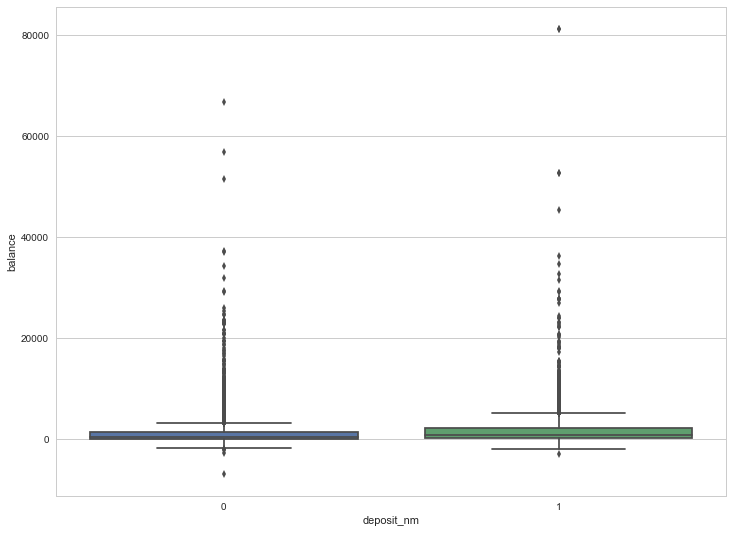

In [201]:
sns.boxplot(x='deposit_nm', y='balance', data=bankcampaigns)

#### As shown above we can see that there are lot of outliers in the "Balance" data and so it would be a good practice to impute the outliers to make sure they dont affect the modle performance

In [35]:
# Impute outliers function
def impute_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

iqr =  1586.0


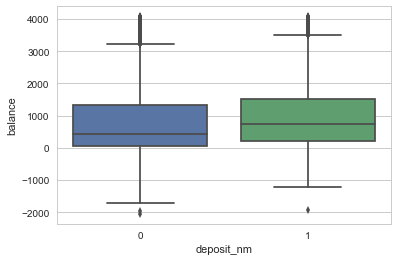

In [36]:

q75, q25 = np.percentile(bankcampaigns['balance'], [75 ,25])
iqr = q75 - q25

print('iqr = ',iqr)
 
min_val = q25 - (iqr*1.5)
max_val = q75 + (iqr*1.5)

bankcampaigns_new = bankcampaigns

bankcampaigns_new = impute_outliers(df=bankcampaigns_new, column='balance' , minimum=min_val, maximum=max_val)

sns.boxplot(x='deposit_nm', y='balance', data=bankcampaigns_new)

#### As shown above with the impute operation the outliers have mostly seem to disappear and the "Balance" data looks well distributed within the min and max values
 

### 'Day'

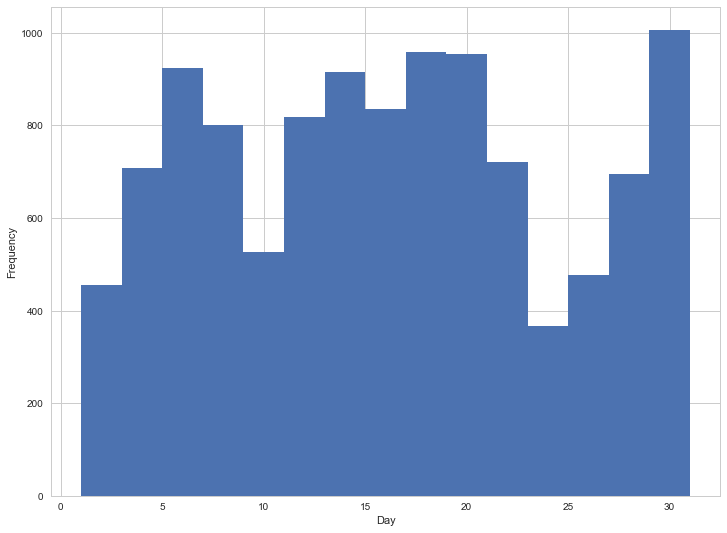

In [203]:
ax = bankcampaigns['day'].plot(kind='hist', bins=15)
ax.set_xlabel("Day")


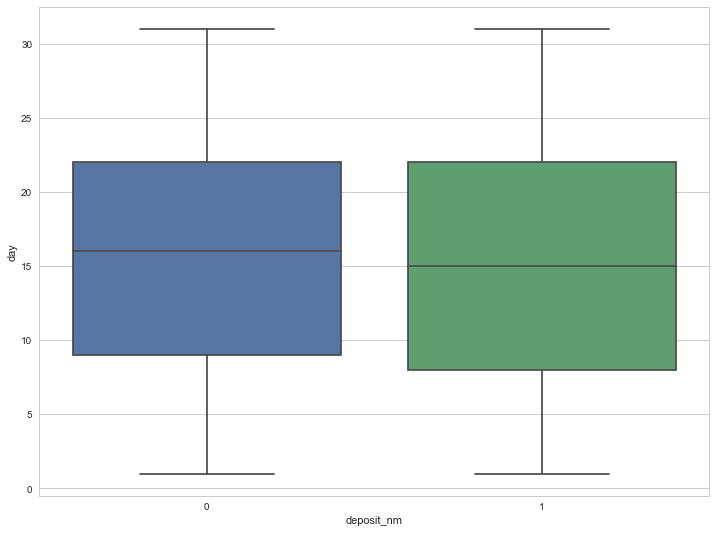

In [204]:
sns.boxplot(x='deposit_nm', y='day', data=bankcampaigns)

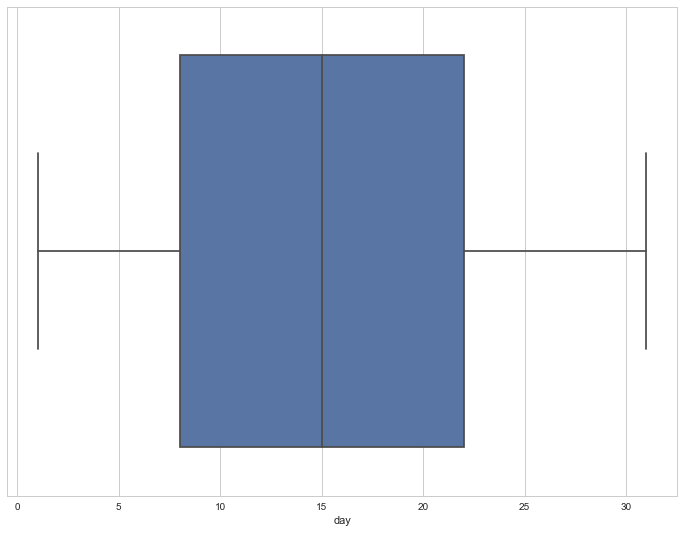

In [205]:
ax = sns.boxplot(x=bankcampaigns["day"])

In [206]:
q75, q25 = np.percentile(bankcampaigns['day'], [75 ,25])

print('q75 = ',q75)
print('q25 = ',q25)

q75 =  22.0
q25 =  8.0


### 'Duration'

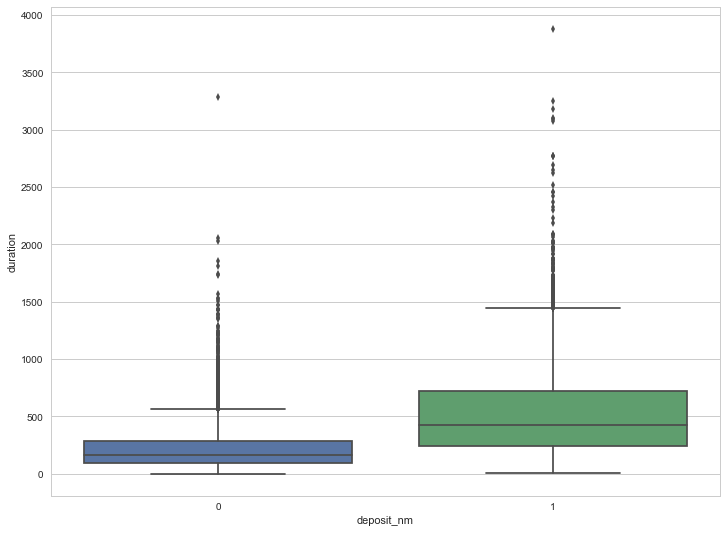

In [207]:
sns.boxplot(x='deposit_nm', y='duration', data=bankcampaigns)

#### As shown above the Duration has quite a lot of outliers and so it would be best to use the outlier impute function

iqr =  358.0


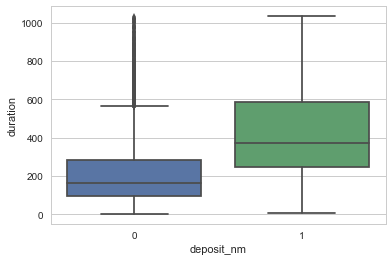

In [37]:
q75, q25 = np.percentile(bankcampaigns['duration'], [75 ,25])
iqr = q75 - q25

print('iqr = ',iqr)
 
min_val = q25 - (iqr*1.5)
max_val = q75 + (iqr*1.5)

#dataset_new = bankcampaigns

bankcampaigns_new = impute_outliers(df=bankcampaigns, column='duration' , minimum=min_val, maximum=max_val)

sns.boxplot(x='deposit_nm', y='duration', data=bankcampaigns_new)

#### As shown above with the impute operation the outliers have mostly seem to disappear and the "Duration" data looks well distributed within the min and max values
 

### 'Campaign'

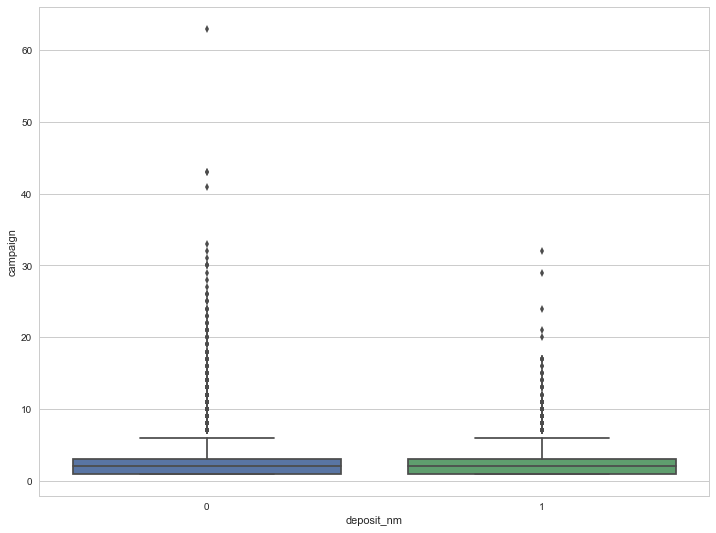

In [209]:
sns.boxplot(x='deposit_nm', y='campaign', data=bankcampaigns)

As shown above the Campaign has quite a lot of outliers and so it would be best to use the outlier impute function

iqr =  2.0


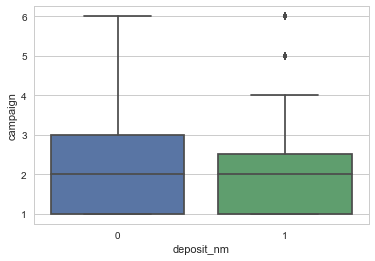

In [38]:
q75, q25 = np.percentile(bankcampaigns['campaign'], [75 ,25])
iqr = q75 - q25

print('iqr = ',iqr)
 
min_val = q25 - (iqr*1.5)
max_val = q75 + (iqr*1.5)

#dataset_new = bankcampaigns

bankcampaigns_new = impute_outliers(df=bankcampaigns, column='campaign' , minimum=min_val, maximum=max_val)

sns.boxplot(x='deposit_nm', y='campaign', data=bankcampaigns_new)

### 'pdays'

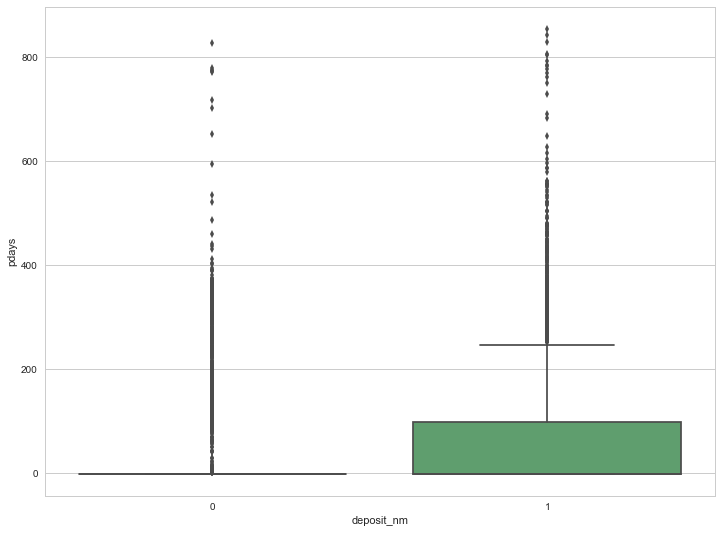

In [211]:
sns.boxplot(x='deposit_nm', y='pdays', data=bankcampaigns)

As shown above the pdays has quite a lot of outliers and so it would be best to use the outlier impute function

iqr =  21.75


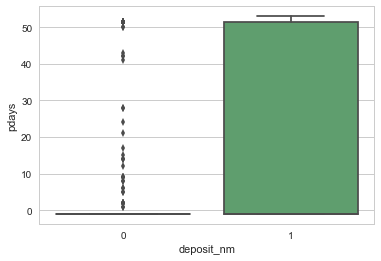

In [39]:
q75, q25 = np.percentile(bankcampaigns['pdays'], [75 ,25])
iqr = q75 - q25

print('iqr = ',iqr)
 
min_val = q25 - (iqr*1.5)
max_val = q75 + (iqr*1.5)

#dataset_new = bankcampaigns

bankcampaigns_new = impute_outliers(df=bankcampaigns, column='pdays' , minimum=min_val, maximum=max_val)

sns.boxplot(x='deposit_nm', y='pdays', data=bankcampaigns_new)

### 'Previous'

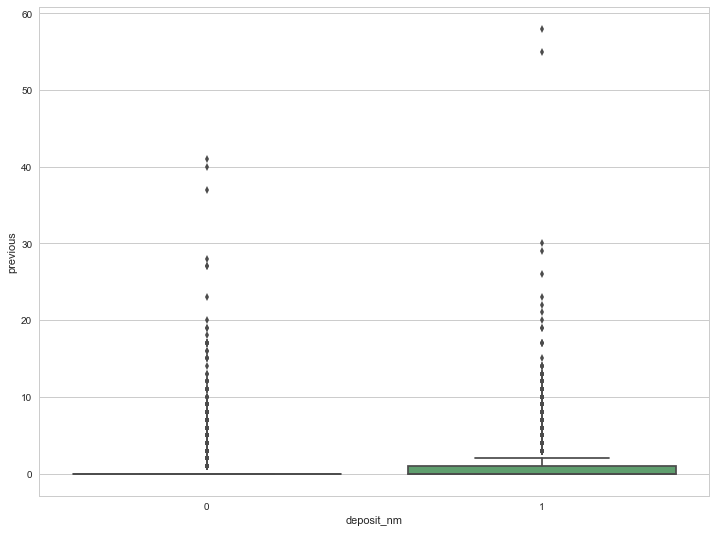

In [213]:
sns.boxplot(x='deposit_nm', y='previous', data=bankcampaigns)

As shown above the previous has quite a lot of outliers and so it would be best to use the outlier impute function

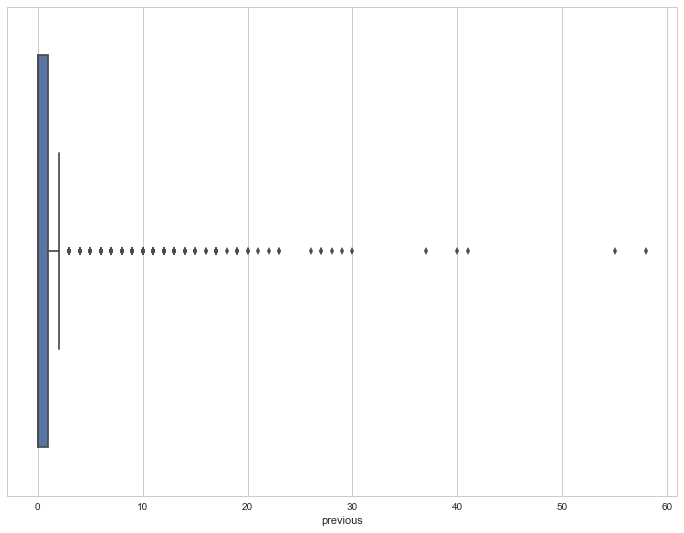

In [214]:
ax = sns.boxplot(x=bankcampaigns["previous"])

iqr =  1.0
q75 =  1.0
q25 =  0.0
min_val =  -1.5
max_val =  2.5


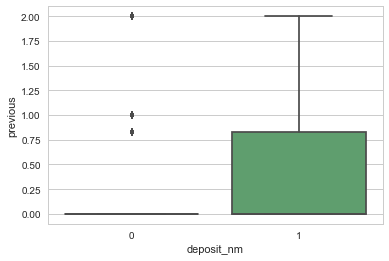

In [40]:
q75, q25 = np.percentile(bankcampaigns['previous'], [75 ,25])
iqr = q75 - q25

print('iqr = ',iqr)


print('q75 = ',q75)
print('q25 = ',q25)

min_val = q25 - (iqr*1.5)
max_val = q75 + (iqr*1.5)

print('min_val = ',min_val)
print('max_val = ',max_val)


#dataset_new = bankcampaigns

bankcampaigns_new = impute_outliers(df=bankcampaigns, column='previous' , minimum=min_val, maximum=max_val)

sns.boxplot(x='deposit_nm', y='previous', data=bankcampaigns_new)

### 1.3 Checking the Corrleation between different variables

In [148]:
bankcampaigns_new.corr()

,age,balance,day,duration,campaign,pdays,previous,deposit_nm
age,1.000000,0.124418,-0.000762,0.006998,0.003239,0.027832,0.019193,0.034901
balance,0.124418,1.000000,-0.002524,0.033158,-0.025456,0.085205,0.075585,0.140769
day,-0.000762,-0.002524,1.000000,-0.025186,0.088648,-0.082047,-0.074453,-0.056326
duration,0.006998,0.033158,-0.025186,1.000000,-0.025647,-0.000392,-0.005235,0.468053
campaign,0.003239,-0.025456,0.088648,-0.025647,1.000000,-0.106884,-0.109126,-0.103261
pdays,0.027832,0.085205,-0.082047,-0.000392,-0.106884,1.000000,0.897565,0.231655
previous,0.019193,0.075585,-0.074453,-0.005235,-0.109126,0.897565,1.000000,0.204665
deposit_nm,0.034901,0.140769,-0.056326,0.468053,-0.103261,0.231655,0.204665,1.000000


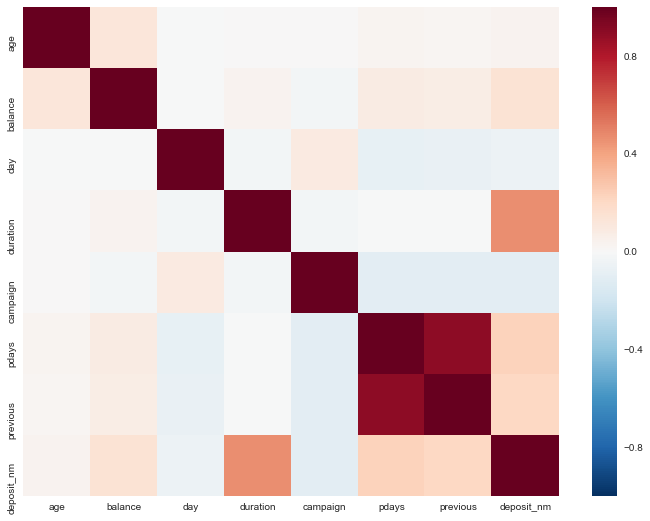

In [149]:
sns.heatmap(bankcampaigns_new.corr())

### 1.4 Performing T-test to check if the Continuous feature is statistically significant or not

#### 'Age'

#### Age is a continuous variable with a Normal distribution so we can use T-Test to check if there is a relationship between Deposit_NM and Age

H0 : (there is no significant difference in the means of the two samples) Mean of Deposit_NM - Mean of Age = 0

Ha : (There is significant difference in the means of the two samples- one tailed)

Mean of Deposit_NM - Mean of Age > 0


In [19]:
stats.ttest_ind(bankcampaigns_new[bankcampaigns_new['deposit_nm']==0]['age'],bankcampaigns_new[bankcampaigns_new['deposit_nm']==1]['age'])


Ttest_indResult(statistic=-3.6892130272779955, pvalue=0.00022601800590796526)

P_Value < 0.05 ,so we reject the null hypothesis and can state that there is significant difference in the means of the two samples and so Deposit_NM can be affected by Age.

#### 'Balance'

#### Balance is a continuous variable with a Normal distribution so we can use T-Test to check if there is a relationship between Deposit_NM and Balance

H0 : (there is no significant difference in the means of the two samples) Mean of Deposit_NM - Mean of Balance = 0

Ha : (There is significant difference in the means of the two samples- one tailed)

Mean of Deposit_NM - Mean of Balance > 0

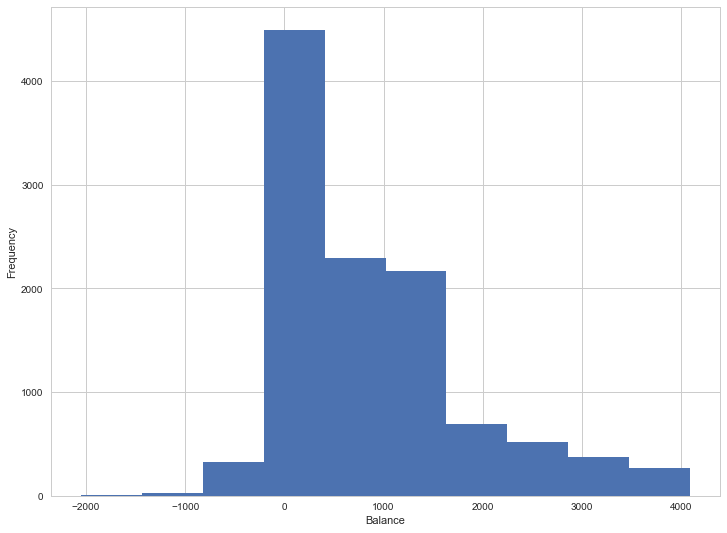

In [151]:
bal = bankcampaigns_new['balance'].plot(kind='hist', bins=10)
bal.set_xlabel("Balance")

In [152]:

pd.DataFrame(bankcampaigns_new.groupby( ['deposit_nm'])['balance'].describe().loc[:,['mean','std']])

balance
deposit_nm                  
0          mean   747.905046
           std    928.071506
1          mean  1022.054227
           std    999.996656

In [153]:
stats.ttest_ind(bankcampaigns_new[bankcampaigns_new['deposit_nm']==0]['balance'],bankcampaigns_new[bankcampaigns_new['deposit_nm']==1]['balance'])


Ttest_indResult(statistic=-15.020577790884301, pvalue=1.6752029049122335e-50)

P_Value < 0.05 ,so we reject the null hypothesis and can state that there is significant difference in the means of the two samples and so Deposit_NM can be affected by Balance.

#### 'Duration'

#### Duration is a continuous variable with a Normal distribution so we can use T-Test to check if there is a relationship between Deposit_NM and Duration

H0 : (there is no significant difference in the means of the two samples) Mean of Deposit_NM - Mean of Duration = 0

Ha : (There is significant difference in the means of the two samples- one tailed)

Mean of Deposit_NM - Mean of Duration > 0

count    11162.000000
mean       315.284991
std        230.891992
min          2.000000
25%        138.000000
50%        255.000000
75%        412.000000
max       1033.000000
Name: duration, dtype: float64

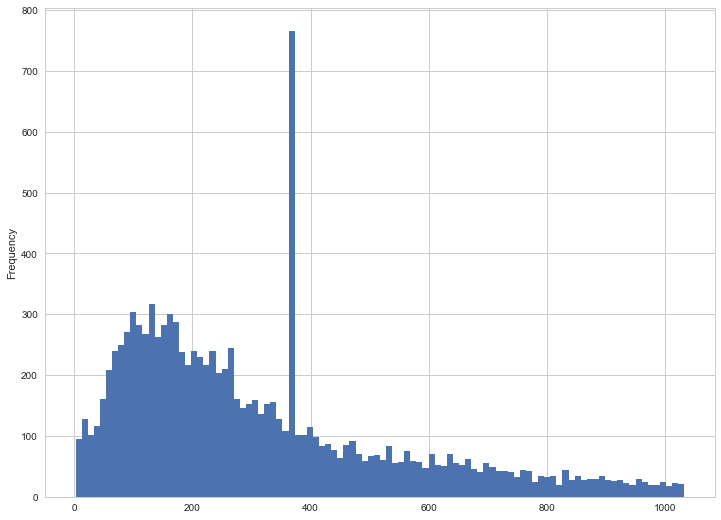

In [154]:
bankcampaigns_new['duration'].plot(kind='hist', bins=100)
bankcampaigns_new['duration'].describe()

In [156]:



pd.DataFrame(bankcampaigns_new.groupby( ['deposit_nm'])['duration'].describe().loc[:,['mean','std']])

duration
deposit_nm                 
0          mean  212.733629
           std   170.661090
1          mean  429.159853
           std   235.643781

In [157]:
stats.ttest_ind(bankcampaigns_new[bankcampaigns_new['deposit_nm']==0]['duration'],bankcampaigns_new[bankcampaigns_new['deposit_nm']==1]['duration'])


Ttest_indResult(statistic=-55.952865882210517, pvalue=0.0)

P_Value < 0.05 ,so we reject the null hypothesis and can state that there is significant difference in the means of the two samples and so Deposit_NM can be affected by Duration.

#### 'Day'

#### Day is a continuous variable with a Normal distribution so we can use T-Test to check if there is a relationship between Deposit_NM and Day

H0 : (there is no significant difference in the means of the two samples) Mean of Deposit_NM - Mean of Day = 0

Ha : (There is significant difference in the means of the two samples- one tailed)

Mean of Deposit_NM - Mean of Day > 0

In [20]:
stats.ttest_ind(bankcampaigns_new[bankcampaigns_new['deposit_nm']==0]['day'],bankcampaigns_new[bankcampaigns_new['deposit_nm']==1]['day'])


Ttest_indResult(statistic=5.9597739148403841, pvalue=2.602202903938695e-09)

P_Value < 0.05 ,so we reject the null hypothesis and can state that there is significant difference in the means of the two samples and so Deposit_NM can be affected by Day.

#### 'Campaign'

Current size: [12.0, 9.0]


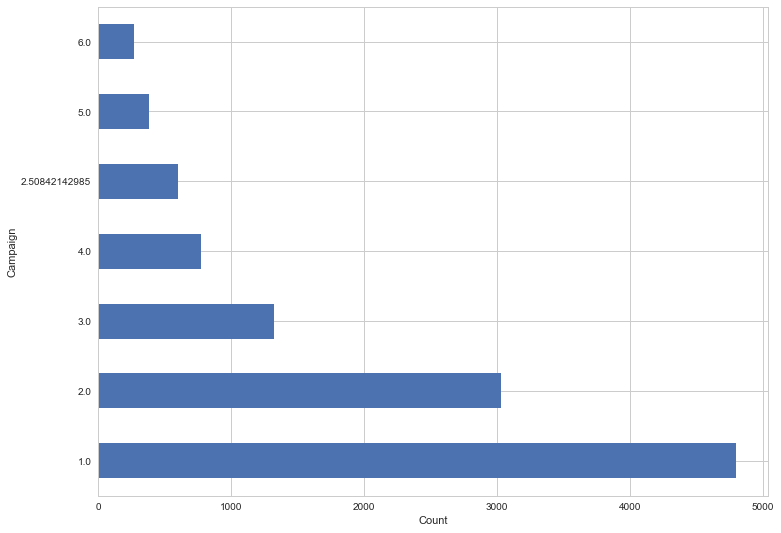

In [23]:
#bankcampaigns['campaign'].plot(kind='hist', bins=10)
#bar plot

camp = bankcampaigns['campaign'].value_counts().plot(kind='barh')
camp.set_xlabel("Count")
camp.set_ylabel("Campaign")

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

#### Campaign is a continuous variable with a Normal distribution so we can use T-Test to check if there is a relationship between Deposit_NM and Day

H0 : (there is no significant difference in the means of the two samples) Mean of Deposit_NM - Mean of Campaign = 0

Ha : (There is significant difference in the means of the two samples- one tailed)

Mean of Deposit_NM - Mean of Campaign > 0

In [22]:
stats.ttest_ind(bankcampaigns_new[bankcampaigns_new['deposit_nm']==0]['campaign'],bankcampaigns_new[bankcampaigns_new['deposit_nm']==1]['campaign'])


Ttest_indResult(statistic=10.967255750563508, pvalue=7.6163759282463954e-28)

P_Value < 0.05 ,so we reject the null hypothesis and can state that there is significant difference in the means of the two samples and so Deposit_NM can be affected by Campaign.

#### 'PDays'

#### PDays is a continuous variable with a Normal distribution so we can use T-Test to check if there is a relationship between Deposit_NM and PDays

H0 : (there is no significant difference in the means of the two samples) Mean of Deposit_NM - Mean of PDays = 0

Ha : (There is significant difference in the means of the two samples- one tailed)

Mean of Deposit_NM - Mean of PDays > 0

In [24]:
stats.ttest_ind(bankcampaigns_new[bankcampaigns_new['deposit_nm']==0]['pdays'],bankcampaigns_new[bankcampaigns_new['deposit_nm']==1]['pdays'])


Ttest_indResult(statistic=-25.156577858406006, pvalue=7.0035142270639801e-136)

P_Value < 0.05 ,so we reject the null hypothesis and can state that there is significant difference in the means of the two samples and so Deposit_NM can be affected by PDays.

#### 'Previous'

#### Previous is a continuous variable with a Normal distribution so we can use T-Test to check if there is a relationship between Deposit_NM and Previous

H0 : (there is no significant difference in the means of the two samples) Mean of Deposit_NM - Mean of Previous = 0

Ha : (There is significant difference in the means of the two samples- one tailed)

Mean of Deposit_NM - Mean of Previous > 0

In [25]:
stats.ttest_ind(bankcampaigns_new[bankcampaigns_new['deposit_nm']==0]['previous'],bankcampaigns_new[bankcampaigns_new['deposit_nm']==1]['previous'])


Ttest_indResult(statistic=-22.08860887075091, pvalue=7.3994198707934054e-106)

P_Value < 0.05 ,so we reject the null hypothesis and can state that there is significant difference in the means of the two samples and so Deposit_NM can be affected by Previous.

### Conclusion - Continuous Variables Statistical Test
#### With the above tests we can conclude that the following continuous variables are statistically significant
#### 'Previous'
#### 'PDays'
#### 'Campaign'
#### 'Duration'
#### 'Day'
#### 'Balance'
#### 'Age'

### 1.5 Performing Chi-Square-test to check if the Categorical feature is statistically significant or not

#### 'Job'

#### Since Deposit_NM and Job are both Catagorical Variables we cannot have Statistics like Mean and std.deviation and so we cannot use T-Test And so we have to use the Chi-Square test.

Ho: There is no relationship between Deposit_NM and Job.

H1: There is relationship between Deposit_NM and Job.

In [158]:
dfjob = pd.crosstab(bankcampaigns_new['deposit_nm'],bankcampaigns_new['job'])
dfjob

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
deposit_nm,,,,,,,,,,,
0,703,1236,205,165,1301,262,218,554,91,983,155
1,631,708,123,109,1335,516,187,369,269,840,202


In [159]:


chi2,p,dof,expected = stats.chi2_contingency(dfjob.values)

print('P-Value = ', p)

P-Value =  4.60873483328e-75


Since P_Value < 0.05 , we can reject the null hypothesis and go with alternate hypothesis that there is a relationship between Deposit_NM and Job

#### 'Marital'

#### Since Deposit_NM and Marital are both Catagorical Variables we cannot have Statistics like Mean and std.deviation and so we cannot use T-Test And so we have to use the Chi-Square test.

Ho: There is no relationship between Deposit_NM and Marital.

H1: There is relationship between Deposit_NM and Marital.

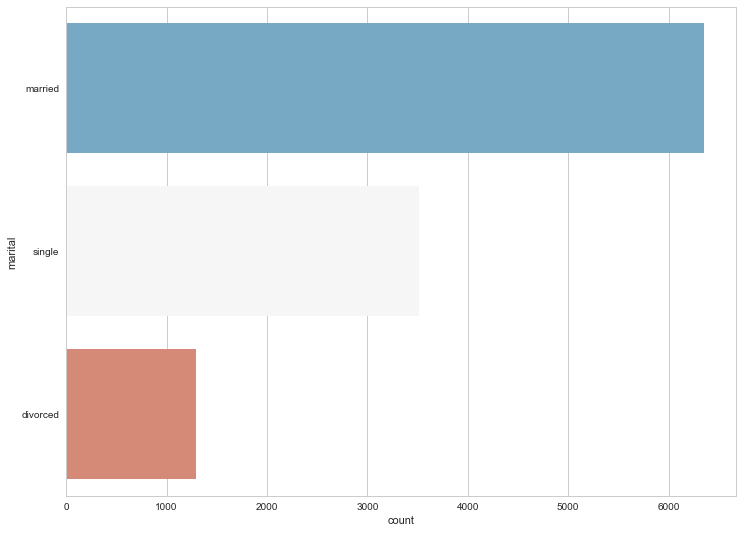

In [160]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns_new['marital'],data=bankcampaigns_new,palette='RdBu_r')

In [161]:
dfmarital = pd.crosstab(bankcampaigns_new['deposit_nm'],bankcampaigns_new['marital'])
dfmarital

marital,divorced,married,single
deposit_nm,,,
0,671,3596,1606
1,622,2755,1912


In [162]:
chi2,p,dof,expected = stats.chi2_contingency(dfmarital.values)

print('P-Value = ', p)

P-Value =  1.60057698809e-24


Since P_Value < 0.05 , we can reject the null hypothesis and go with alternate hypothesis that there is a relationship between Deposit_NM and Marital

#### 'Contact'

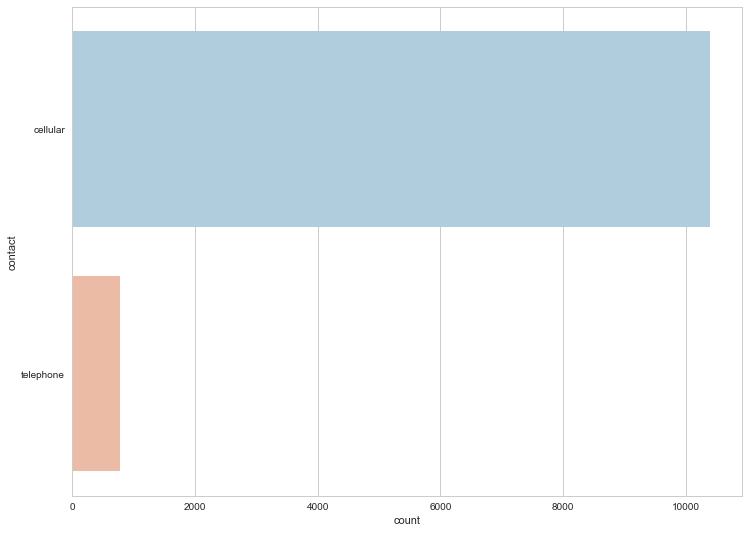

In [163]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns_new['contact'],data=bankcampaigns_new,palette='RdBu_r')

#### Since Deposit_NM and Contact are both Catagorical Variables we cannot have Statistics like Mean and std.deviation and so we cannot use T-Test And so we have to use the Chi-Square test.¶

Ho: There is no relationship between Deposit_NM and Contact.

H1: There is relationship between Deposit_NM and Contact.

In [164]:
dfcontact = pd.crosstab(bankcampaigns_new['deposit_nm'],bankcampaigns_new['contact'])
dfcontact

contact,cellular,telephone
deposit_nm,,
0,5489,384
1,4899,390


In [165]:
chi2,p,dof,expected = stats.chi2_contingency(dfcontact.values)

print('P-Value = ', p)

P-Value =  0.0896073926119


Since P_Value > 0.05 , we fail to reject the null hypothesis and can say that there is no relationship between Deposit_NM and Contact

#### 'Education'

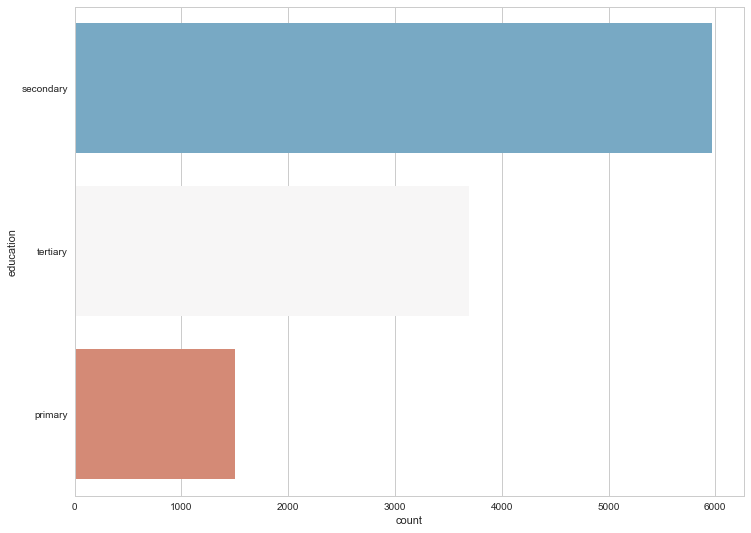

In [166]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns_new['education'],data=bankcampaigns_new,palette='RdBu_r')

#### Since Deposit_NM and Education are both Catagorical Variables we cannot have Statistics like Mean and std.deviation and so we cannot use T-Test And so we have to use the Chi-Square test.¶
Ho: There is no relationship between Deposit_NM and Education.

H1: There is relationship between Deposit_NM and Education.

In [167]:
dfedu = pd.crosstab(bankcampaigns_new['deposit_nm'],bankcampaigns_new['education'])
dfedu

education,primary,secondary,tertiary
deposit_nm,,,
0,909,3271,1693
1,591,2702,1996


In [168]:
#taking unknown out to perform Chi-square test

#w = bankcampaigns[bankcampaigns.education!='unknown']

#dfedo = pd.crosstab(bankcampaigns['deposit_nm'],w['education'])

chi2,p,dof,expected = stats.chi2_contingency(dfedu.values)

print('P-Value = ', p)

P-Value =  5.65173108273e-26


Since P_Value < 0.05 , we can reject the null hypothesis and go with alternate hypothesis that there is a relationship between Deposit_NM and Education

#### 'Loan'

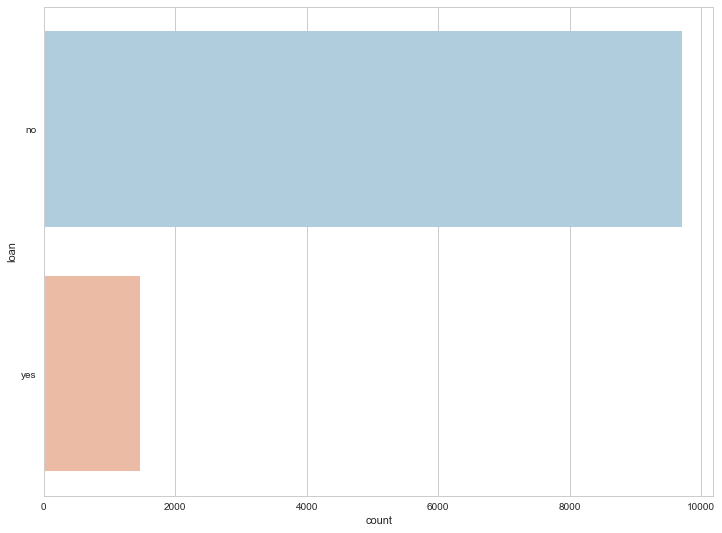

In [169]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns_new['loan'],data=bankcampaigns_new,palette='RdBu_r')

#### Since Deposit_NM and Loan are both Catagorical Variables we cannot have Statistics like Mean and std.deviation and so we cannot use T-Test And so we have to use the Chi-Square test.¶
Ho: There is no relationship between Deposit_NM and Loan.

H1: There is relationship between Deposit_NM and Loan.

In [170]:
dfloan = pd.crosstab(bankcampaigns_new['deposit_nm'],bankcampaigns_new['loan'])
dfloan

loan,no,yes
deposit_nm,,
0,4897,976
1,4805,484


In [171]:
chi2,p,dof,expected = stats.chi2_contingency(dfloan.values)

print('P-Value = ', p)

P-Value =  2.17128687963e-31


Since P_Value < 0.05 , we can reject the null hypothesis and go with alternate hypothesis that there is a relationship between Deposit_NM and Loan

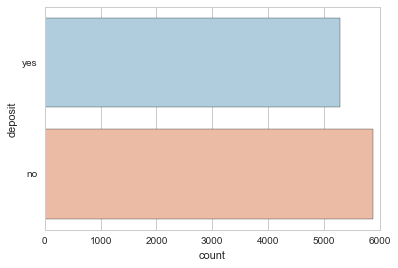

In [77]:
sns.set_style('whitegrid')
sns.countplot(y=bankcampaigns['deposit'],data=bankcampaigns,palette='RdBu_r')
#its balanced
#change yes and no to 0 and 1 

### Conclusion - Categorical Variables Statistical Test
#### With the above tests we can conclude that the following categorical variables are statistically significant
#### 'Job'
#### 'Marital'
#### 'Education'
#### 'Loan'

#### We found that 'Contact' is not Statistically significant

In [45]:

bankcampaigns['deposit_nm'].describe()

count    11162.000000
mean         0.473840
std          0.499338
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: deposit_nm, dtype: float64

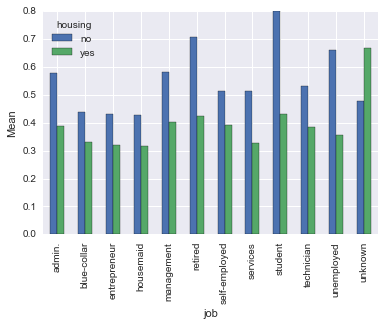

In [27]:

bankcampaigns.groupby(['job','housing'])['deposit_nm'].mean().unstack().plot(kind='bar').set_ylabel('Mean')

In [58]:
list(bankcampaigns_new.columns.values)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'deposit',
 'deposit_nm',
 'intercept']

In [60]:
dfloan2 = pd.crosstab(bankcampaigns_new['deposit_nm'],bankcampaigns_new['loan'])
dfloan2

loan,no,yes
deposit_nm,,
0,4897,976
1,4805,484


In [59]:


print(bankcampaigns_new.columns[0:15])

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')


In [72]:
dataset_Y = bankcampaigns_new['deposit_nm']
dataset_X = bankcampaigns_new[bankcampaigns_new.columns[0:15]]

In [73]:
dataset_Y.describe()

count    11162.000000
mean         0.473840
std          0.499338
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: deposit_nm, dtype: float64

In [41]:
dataset_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null float64
campaign     11162 non-null float64
pdays        11162 non-null float64
previous     11162 non-null float64
dtypes: float64(4), int64(3), object(8)
memory usage: 1.3+ MB


### 3.0 Feature Engineering - Multi-Collinearity Detection 

In [31]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


df = bankcampaigns._get_numeric_data()

df.head()

,age,balance,day,duration,campaign,pdays,previous,deposit_nm
0,59,2343,5,1042,1,-1,0,1
1,56,45,5,1467,1,-1,0,1
2,41,1270,5,1389,1,-1,0,1
3,55,2476,5,579,1,-1,0,1
4,54,184,5,673,2,-1,0,1


In [32]:


features = df.drop(['deposit_nm'], axis=1)
feaures = features.dropna()

In [36]:
y, X = dmatrices('deposit_nm~age+duration+campaign+pdays+previous',df, return_type="dataframe")

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [68]:
 1 / (1- (0.9 ** 2))

5.263157894736843

In [37]:
vif.round(1)

,VIF Factor,features
0,15.5,Intercept
1,1.0,age
2,1.0,duration
3,1.0,campaign
4,1.4,pdays
5,1.3,previous


### So far we have been able to drop "poutcome" variable and we also found that "Contact" is not a statistically significant variable based on the Statistical test as well as summary report from Logistic Regression.  

### 3.1 Feature Engineering - One-hot Encoding and dropping columns that are highly co-related

#### Note that we use 'drop_first = True' to avoid multi-colinearity

In [42]:
dataset_X_dummy = pd.get_dummies(dataset_X,drop_first=True)
print(dataset_X_dummy.head())

   age  balance  day    duration  campaign  pdays  previous  job_blue-collar  \
0   59   2343.0    5  371.993818       1.0   -1.0       0.0                0   
1   56     45.0    5  371.993818       1.0   -1.0       0.0                0   
2   41   1270.0    5  371.993818       1.0   -1.0       0.0                0   
3   55   2476.0    5  579.000000       1.0   -1.0       0.0                0   
4   54    184.0    5  673.000000       2.0   -1.0       0.0                0   

   job_entrepreneur  job_housemaid    ...      month_dec  month_feb  \
0                 0              0    ...              0          0   
1                 0              0    ...              0          0   
2                 0              0    ...              0          0   
3                 0              0    ...              0          0   
4                 0              0    ...              0          0   

   month_jan  month_jul  month_jun  month_mar  month_may  month_nov  \
0          0         

### 4. Logistic Regresion for Classification - No Crossvalidation - Using "Statsmodels" to capture the important features

In [75]:
dataset_X_dummy['intercept'] = 1

#bankcampaigns = bankcampaigns.join(pd.get_dummies(bankcampaigns['job']))
#bankcampaigns['ab_page'] = pd.get_dummies(bankcampaigns['job'])
import statsmodels.api as sm
logit = sm.Logit(dataset_Y, dataset_X_dummy)
result = logit.fit()
result.summary()





Optimization terminated successfully.
         Current function value: 0.454697
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             deposit_nm   No. Observations:                11162
Model:                          Logit   Df Residuals:                    11125
Method:                           MLE   Df Model:                           36
Date:                Sat, 30 Jun 2018   Pseudo R-squ.:                  0.3427
Time:                        18:04:57   Log-Likelihood:                -5075.3
converged:                       True   LL-Null:                       -7721.6
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0009      0.003     -0.288      0.773      -0.007       0.005
balance                 0.0002   2.63e-05      7.680      0.000       0.000       0.000
day                    -0.0051      0.003     -1.570      0.116      -0.012       0.001
duration                0.0064      0.000     44.666      0.000       0.006       0.007
campaign               -0.1188      0.021     -5.597      0.000      -0.160      -0.077
pdays                   0.0241      0.002      9.726      0.000       0.019       0.029
previous               -0.0852      0.098     -0.867      0.386      -0.278       0.107
job_blue-collar        -0.3190      0.097     -3.282      0.001      -0.509      -0.128
job_entrepreneur       -0.4711      0.167     -2.821      0.005      -0.799      -0.144
job_housemaid          -0.3396      0.178     -1.910      0.056      -0.688       0.009
job_management         -0.2743      0.100     -2.756      0.006      -0.469      -0.079
job_retired             0.2790      0.138      2.016      0.044       0.008       0.550
job_self-employed      -0.4372      0.150     -2.908      0.004      -0.732      -0.143
job_services           -0.2470      0.112     -2.209      0.027      -0.466      -0.028
job_student             0.6661      0.167      3.993      0.000       0.339       0.993
job_technician         -0.1678      0.093     -1.797      0.072      -0.351       0.015
job_unemployed         -0.0828      0.158     -0.525      0.599      -0.392       0.226
marital_married        -0.2269      0.080     -2.841      0.004      -0.383      -0.070
marital_single          0.0582      0.092      0.633      0.527      -0.122       0.238
education_secondary     0.2495      0.085      2.920      0.004       0.082       0.417
education_tertiary      0.5428      0.102      5.331      0.000       0.343       0.742
default_yes            -0.3172      0.219     -1.445      0.148      -0.747       0.113
housing_yes            -0.7508      0.057    -13.065      0.000      -0.863      -0.638
loan_yes               -0.3992      0.078     -5.117      0.000      -0.552      -0.246
contact_telephone       0.0589      0.103      0.572      0.568      -0.143       0.261
month_aug              -0.6542      0.107     -6.125      0.000      -0.864      -0.445
month_dec               1.3345      0.363      3.680      0.000       0.624       2.045
month_feb              -0.2145      0.123     -1.747      0.081      -0.455       0.026
month_jan              -0.9889      0.157     -6.284      0.000      -1.297      -0.680
month_jul              -0.7298      0.108     -6.769      0.000      -0.941      -0.518
month_jun              -0.5085      0.111     -4.568      0.000      -0.727      -0.290
month_mar               1.9716      0.228      8.664      0.000       1.526       2.418
month_may              -1.1332      0.098    -11.593      0.000      -1.325      -0.942
month_nov              -0.8827      0.115     -7.675      0.000      -1.1

### 4.1 Logistic Regresion for Classification - No Crossvalidation - Using "SkLearn" to Predict

In [77]:


X_train, X_test, y_train, y_test = train_test_split(dataset_X_dummy,dataset_Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [93]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


### 4.2 Logistic Regresion for Classification - 10-Fold Crossvalidation - Using "SkLearn" to Predict

In [82]:
# Create the hyperparameter grid
c_space = [0.001, 0.1, 1, 10, 100,1000,20]
param_grid = {'C': c_space}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()




# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=10)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))



Tuned Logistic Regression Parameter: {'C': 1}
Tuned Logistic Regression Accuracy: 0.7955192034139402


In [83]:
accuracy_score(logreg_cv.predict(X_test), y_test)

0.77813333333333334

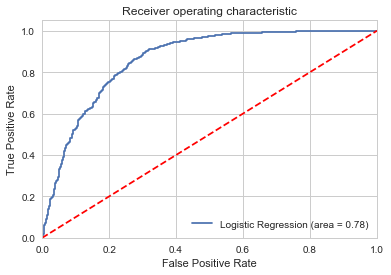

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg_cv.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_cv.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 5. Descision Tree for Classification - No Crossvalidation

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(dataset_X_dummy, dataset_Y, test_size=0.3, random_state=101)

dtree = DecisionTreeClassifier(max_depth=4)






result = dtree.fit(X_train,y_train)

predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("AUC Score - ",roc_auc_score(y_test,predictions))

#tree is non parameetric where as logistic/linear regression are parametric 
#.feature importances can give us the feature importance 

             precision    recall  f1-score   support

          0       0.79      0.78      0.78      1761
          1       0.76      0.77      0.76      1588

avg / total       0.77      0.77      0.77      3349

[[1373  388]
 [ 368 1220]]
AUC Score -  0.773966303208


Prediction and evaluation

### 5.1 Descision Tree Classifier - Using 5-Fold Crossvalidation

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

#use the training - use 80% of data for cross validation for hyper parameter tuning 
#use them to test 20% data keep it out of the training process 

#X_train, X_test, y_train, y_test = train_test_split(dataset_X_dummy, dataset_Y, test_size=0.3, random_state=101)

ctree = DecisionTreeClassifier(max_depth=4)

cv_scores = cross_val_score(ctree,dataset_X_dummy,dataset_Y, cv=5,scoring='roc_auc')

print("AUC scores computed using 5-fold cross-validation: {}".format(cv_scores))

# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


AUC scores computed using 5-fold cross-validation: [ 0.8518976   0.76854201  0.77477175  0.83778698  0.83774552]
Average 5-Fold CV Score: 0.8141487715286809


### 5.2 Descision Tree Classifier - Using 10-Fold Crossvalidation

In [272]:
cten_scores = cross_val_score(ctree,dataset_X_dummy,dataset_Y, cv=10,scoring='roc_auc')

print("AUC scores computed using 10-fold cross-validation: {}".format(cten_scores))

# Print the average 5-fold cross-validation score
print("Average 10-Fold CV Score: {}".format(np.mean(cten_scores)))

AUC scores computed using 10-fold cross-validation: [ 0.92535171  0.8794896   0.70546082  0.79895853  0.70728416  0.77634024
  0.82913182  0.87265195  0.84589869  0.84209805]
Average 10-Fold CV Score: 0.818266557299491




### 5.3 Checking the Max_Depth of the tree agaist the accuracy 


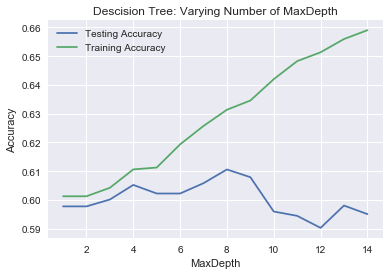

In [13]:
# Setup arrays to store train and test accuracies
tree_maxdepth = np.arange(1, 15)
train_accuracy = np.empty(len(tree_maxdepth))
test_accuracy = np.empty(len(tree_maxdepth))

# Loop over different values of k
for i, k in enumerate(tree_maxdepth):
    # Setup a k-NN Classifier with k neighbors: knn
    dtree = DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    dtree.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = dtree.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = dtree.score(X_test, y_test)

# Generate plot
plt.title('Descision Tree: Varying Number of MaxDepth')
plt.plot(tree_maxdepth, test_accuracy, label = 'Testing Accuracy')
plt.plot(tree_maxdepth, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('MaxDepth')
plt.ylabel('Accuracy')
plt.show()

#high bias < 8
#high variance > 8

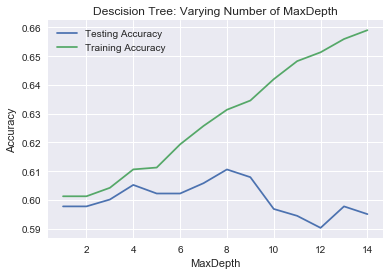

In [23]:
alpha_space = np.arange(1, 15)
ridge_scores = []
ridge_scores_std = []

# Compute scores over range of alphas
for alpha in alpha_space:
    
   
    dtree = DecisionTreeClassifier(max_depth=alpha)

    # Fit the classifier to the training data
    dtree.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    ridge_scores.append(dtree.score(X_train, y_train))
    

    #Compute accuracy on the testing set
    ridge_scores_std.append(dtree.score(X_test, y_test))
    

plt.title('Descision Tree: Varying Number of MaxDepth')
plt.plot(tree_maxdepth, ridge_scores_std, label = 'Testing Accuracy')
plt.plot(tree_maxdepth, ridge_scores, label = 'Training Accuracy')
plt.legend()
plt.xlabel('MaxDepth')
plt.ylabel('Accuracy')
plt.show()    
    

   
    
   

model becomes more specific to trainng data after 8 , it tries to fit to training but since the values are different 
so it is overfitting 

at 1 , its an underfit case since 

In [51]:
import sklearn

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV



In [51]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
 
    score = r2_score(y_true, y_predict)
 
    return score

### 5.4 Using GridSearchCV with ShuffleSplit to train the classifier and get the best fit



In [97]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0) #validation/holdout size=0.20

    #   Create a decision tree regressor object
    regressor = DecisionTreeClassifier()

    #  Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [2,4,8,11]}

    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    #  Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [59]:
Xtrain, Xtest, ytrain, ytest = train_test_split(dataset_X_dummy,dataset_Y,train_size=0.8)


clf2 = fit_model(Xtrain, ytrain)

#print(clf2)

predictions = clf2.predict(Xtest)  

#clft = do_classify(DecisionTreeClassifier(),Xtrain,ytrain,{"max_depth": [1,2,3,4,5,8]}) 
                                                               
predictions = clf2.predict(Xtest)    


                                                 

In [60]:
from sklearn.metrics import confusion_matrix

print(classification_report(ytest,predictions))
print(confusion_matrix(ytest,predictions))
          

             precision    recall  f1-score   support

          0       0.83      0.77      0.80      1145
          1       0.77      0.83      0.80      1088

avg / total       0.80      0.80      0.80      2233

[[882 263]
 [186 902]]


In [61]:
print("AUC Score - ",roc_auc_score(ytest,predictions))

AUC Score -  0.799674897251


### 5.5 Function and Data Frame Transformation to support Normalized values of Numerical Variables

In [31]:

featurenames = np.array(dataset_X_dummy.columns.values)



featurenames

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep'], dtype=object)

In [88]:
def stanrdadize(indf,featurenames,standardize=False):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
      
    return subdfstd

In [89]:
featurenames_numeric = ['age','balance','duration','previous','day','campaign','pdays']

stanrdaized_df = stanrdadize(dataset_X_dummy,featurenames_numeric,True)

stanrdaized_df.describe()

,age,balance,duration,previous,day,campaign,pdays
count,1.116200e+04,1.116200e+04,1.116200e+04,1.116200e+04,1.116200e+04,1.116200e+04,1.116200e+04
mean,4.923892e-16,-1.389780e-14,1.228864e-15,-1.848447e-14,-2.458166e-16,-7.530201e-15,-1.926914e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.950074e+00,-3.009687e+00,-1.356846e+00,-5.279486e-01,-1.740707e+00,-8.519542e-01,-5.787620e-01
25%,-7.749233e-01,-7.761820e-01,-7.678265e-01,-5.279486e-01,-9.094256e-01,-8.519542e-01,-5.787620e-01
50%,-1.873482e-01,-3.360622e-01,-2.610961e-01,-5.279486e-01,-7.814470e-02,-4.101632e-02,-5.787620e-01
75%,6.520450e-01,6.691577e-01,4.188755e-01,9.496717e-01,7.531362e-01,3.712819e-01,3.840203e-01
max,4.513253e+00,3.300068e+00,3.108445e+00,3.021647e+00,1.821926e+00,3.202735e+00,1.811594e+00


In [47]:
dataset_X_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 36 columns):
age                    11162 non-null int64
balance                11162 non-null float64
day                    11162 non-null int64
duration               11162 non-null float64
campaign               11162 non-null float64
pdays                  11162 non-null int64
previous               11162 non-null int64
job_blue-collar        11162 non-null uint8
job_entrepreneur       11162 non-null uint8
job_housemaid          11162 non-null uint8
job_management         11162 non-null uint8
job_retired            11162 non-null uint8
job_self-employed      11162 non-null uint8
job_services           11162 non-null uint8
job_student            11162 non-null uint8
job_technician         11162 non-null uint8
job_unemployed         11162 non-null uint8
marital_married        11162 non-null uint8
marital_single         11162 non-null uint8
education_secondary    11162 non-null uint8
educa

In [91]:
non_stanrdized_df = dataset_X_dummy.iloc[:,7:37]



non_stanrdized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 30 columns):
job_blue-collar        11162 non-null uint8
job_entrepreneur       11162 non-null uint8
job_housemaid          11162 non-null uint8
job_management         11162 non-null uint8
job_retired            11162 non-null uint8
job_self-employed      11162 non-null uint8
job_services           11162 non-null uint8
job_student            11162 non-null uint8
job_technician         11162 non-null uint8
job_unemployed         11162 non-null uint8
marital_married        11162 non-null uint8
marital_single         11162 non-null uint8
education_secondary    11162 non-null uint8
education_tertiary     11162 non-null uint8
default_yes            11162 non-null uint8
housing_yes            11162 non-null uint8
loan_yes               11162 non-null uint8
contact_telephone      11162 non-null uint8
month_aug              11162 non-null uint8
month_dec              11162 non-null uint8
month_feb  

In [93]:
dataset_X_dummy_t = pd.concat([stanrdaized_df, non_stanrdized_df], axis=1)

In [57]:
dataset_X_dummy_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 36 columns):
age                    11162 non-null float64
balance                11162 non-null float64
duration               11162 non-null float64
previous               11162 non-null float64
day                    11162 non-null float64
campaign               11162 non-null float64
pdays                  11162 non-null float64
job_blue-collar        11162 non-null uint8
job_entrepreneur       11162 non-null uint8
job_housemaid          11162 non-null uint8
job_management         11162 non-null uint8
job_retired            11162 non-null uint8
job_self-employed      11162 non-null uint8
job_services           11162 non-null uint8
job_student            11162 non-null uint8
job_technician         11162 non-null uint8
job_unemployed         11162 non-null uint8
marital_married        11162 non-null uint8
marital_single         11162 non-null uint8
education_secondary    11162 non-null uin


### 5.6 Descision Tree for Classification with Normalized values of Numerical Variables

In [98]:
Xtrain_t, Xtest_t, ytrain_t, ytest_t = train_test_split(dataset_X_dummy_t,dataset_Y,train_size=0.8)


clf3 = fit_model(Xtrain_t, ytrain_t)

#print(clf2)

predictions_t = clf3.predict(Xtest_t)  

#clft = do_classify(DecisionTreeClassifier(),Xtrain,ytrain,{"max_depth": [1,2,3,4,5,8]}) 
                                                               
#predictions_t = clf3.predict(Xtest_t)    

print(classification_report(ytest_t,predictions_t))
print(confusion_matrix(ytest_t,predictions_t))

             precision    recall  f1-score   support

          0       0.85      0.77      0.81      1170
          1       0.77      0.85      0.81      1063

avg / total       0.81      0.81      0.81      2233

[[904 266]
 [158 905]]


In [99]:
print("AUC Score - ",roc_auc_score(ytest_t,predictions_t))

AUC Score -  0.81200681831


#### Conclusion : With Descision Tree we are getting the accuracy of around - 80% without Normalization and the accuracy of around - 81% with Normalization. 

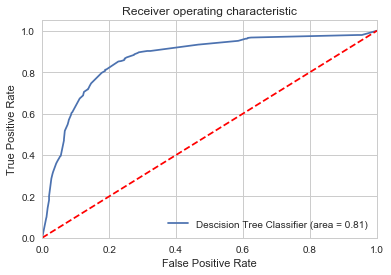

In [102]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ytest_t, clf3.predict(Xtest_t))
fpr, tpr, thresholds = roc_curve(ytest_t, clf3.predict_proba(Xtest_t)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Descision Tree Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 6. Random Forest for Classification 

#### Descision Tree suffers from Overfitting problem and so we use RandomForest to overcome this problem.

#### The random-forest algorithm brings extra randomness into the model, when it is growing the trees. Instead of searching for the best feature while splitting a node, it searches for the best feature among a random subset of features. This process creates a wide diversity, which generally results in a better model that reduces overfitting

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
from sklearn.cross_validation import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

#### Difference in KFold and ShuffleSplit output

KFold will divide your data set into prespecified number of folds, and every sample must be in one and only one fold. A fold is a subset of your dataset.

ShuffleSplit will randomly sample your entire dataset during each iteration to generate a training set and a test set. The test_size and train_size parameters control how large the test and training test set should be for each iteration. Since you are sampling from the entire dataset during each iteration, values selected during one iteration, could be selected again during another iteration.

Summary: ShuffleSplit works iteratively, KFold just divides the dataset into k folds.

Difference when doing validation

In KFold, during each round you will use one fold as the test set and all the remaining folds as your training set. However, in ShuffleSplit, during each round n you should only use the training and test set from iteration n. As your data set grows, cross validation time increases, making shufflesplits a more attractive alternate. If you can train your algorithm, with a certain percentage of your data as opposed to using all k-1 folds, ShuffleSplit is an attractive option.

In [104]:
'''
bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False

'''

def fit_model_rf(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0) #validation/holdout size=0.20

    #   Create a decision tree regressor object
    classifier = RandomForestClassifier()

    #  Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    #params = {'max_depth': range(1, 11),'max_leaf_nodes':[200,300],'n_estimators':[5,10,20]}
    
    params = {'max_depth': [2,4,8],'n_estimators':[10,50,100,150]}
    
    
    '''
       params = {
                'bootstrap': [True], #check with False
                'max_depth': [80, 90, 100, 110], # 2,4,8 small trees with random forest ,
                will give us overfitting with large trees, use very simple trees but many of them
                'max_features': [2, 3], # keep wide range , 10,100
                'min_samples_leaf': [3, 4, 5], #can avoid it
                'min_samples_split': [8, 10, 12], #use small numbers 4,40
                'n_estimators': [100, 200, 300, 1000] #this is important 10,50,100,150
                }

    
    '''
    

    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    #  Create the grid search object
    grid = GridSearchCV(classifier, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### 6.1 Random Forest with Normalized Data for Numeric Features

In [58]:
#lets first try the standardized data set 




Xtrain, Xtest, ytrain, ytest = train_test_split(dataset_X_dummy_t,dataset_Y,train_size=0.8)


clf6 = fit_model_rf(Xtrain, ytrain)

print(clf6)

predictions = clf6.predict(Xtest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [59]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

             precision    recall  f1-score   support

          0       0.84      0.81      0.82      1165
          1       0.80      0.84      0.82      1068

avg / total       0.82      0.82      0.82      2233



### 6.2 Random Forest with Not Normalized Data for Numeric Features

In [105]:
Xtrain, Xtest, ytrain, ytest = train_test_split(dataset_X_dummy,dataset_Y,train_size=0.8)


clf7 = fit_model_rf(Xtrain, ytrain)

print(clf7)

predictions = clf7.predict(Xtest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [106]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

             precision    recall  f1-score   support

          0       0.88      0.79      0.83      1180
          1       0.79      0.88      0.83      1053

avg / total       0.84      0.83      0.83      2233



In [107]:

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(ytest,predictions)
print(confusion_matrix)


[[931 249]
 [130 923]]


In [108]:
print("AUC Score - ",roc_auc_score(ytest,predictions))

AUC Score -  0.832763130362


In [50]:
from sklearn.metrics import accuracy_score

In [109]:
#print "Train Accuracy :: ", accuracy_score(train_y, trained_model.predict(train_x))
print ("Test Accuracy  :: ", accuracy_score(ytest, predictions))

Test Accuracy  ::  0.830273175101


#### As we can see Random Forest with Normalized Data for Numeric Features vs Random Forest with Not Normalized Data for Numeric Features is yielding the same Accuracy so for Random Forest we can conclude that Normalization of Numerical Features is not making any difference.

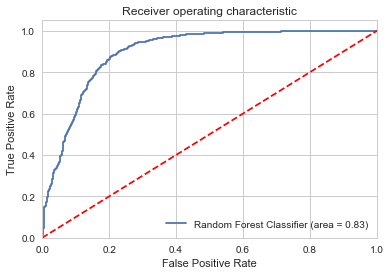

In [111]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ytest, clf7.predict(Xtest))
fpr, tpr, thresholds = roc_curve(ytest, clf7.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 6.3 Extracting the Important Features 

In [128]:
feature_list = np.array(dataset_X_dummy.columns.values)


In [136]:
feature_list

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep'], dtype=object)

In [135]:
# Get numerical feature importances
importances = list(clf3.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: campaign             Importance: 0.53
Variable: duration             Importance: 0.12
Variable: marital_married      Importance: 0.08
Variable: age                  Importance: 0.05
Variable: day                  Importance: 0.04
Variable: month_may            Importance: 0.04
Variable: balance              Importance: 0.03
Variable: month_sep            Importance: 0.03
Variable: month_nov            Importance: 0.02
Variable: default_yes          Importance: 0.01
Variable: month_dec            Importance: 0.01
Variable: month_jan            Importance: 0.01
Variable: month_oct            Importance: 0.01
Variable: pdays                Importance: 0.01
Variable: contact_telephone    Importance: 0.0
Variable: education_secondary  Importance: 0.0
Variable: education_tertiary   Importance: 0.0
Variable: housing_yes          Importance: 0.0
Variable: intercept            Importance: 0.0
Variable: job_blue-collar      Importance: 0.0
Variable: job_entrepreneur     Importance: 0.0

Current size: [12.0, 9.0]


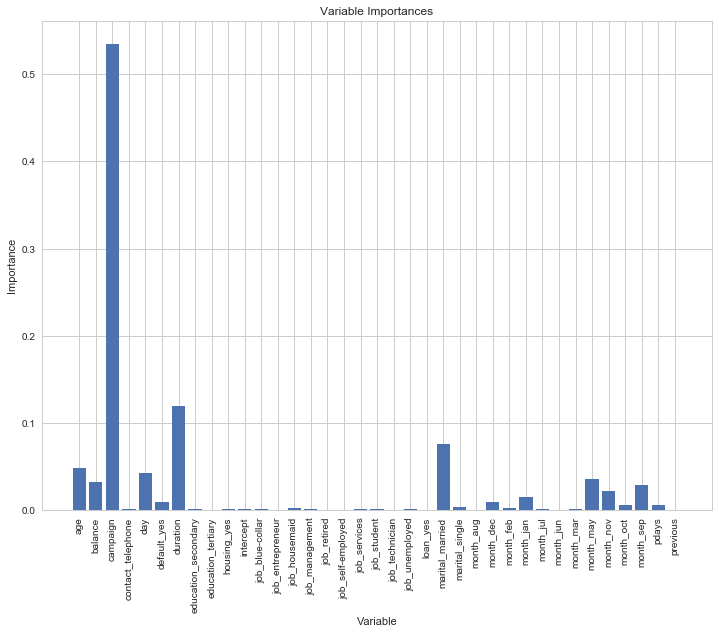

In [146]:
#make sorting from max to min so the chart shows it in the order
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
#plt.bar(x_values, importances.sort(), orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

#plt.xticks(x_values, feature_importances, rotation='vertical')


# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size



### 6.4 Random Forest With only the most significant Features identified above

In [44]:
important_features_df = dataset_X_dummy[['age','balance','day','duration','campaign','pdays','previous','housing_yes','month_mar','month_may','month_sep','month_oct','month_nov']]


In [46]:
important_features_df.head()

,age,balance,day,duration,campaign,pdays,previous,housing_yes,month_mar,month_may,month_sep,month_oct,month_nov
0,59,2343.0,5,371.993818,1.0,-1.0,0.0,1,0,1,0,0,0
1,56,45.0,5,371.993818,1.0,-1.0,0.0,0,0,1,0,0,0
2,41,1270.0,5,371.993818,1.0,-1.0,0.0,1,0,1,0,0,0
3,55,2476.0,5,579.000000,1.0,-1.0,0.0,1,0,1,0,0,0
4,54,184.0,5,673.000000,2.0,-1.0,0.0,0,0,1,0,0,0


In [55]:


Xtrain, Xtest, ytrain, ytest = train_test_split(important_features_df,dataset_Y,train_size=0.8)


clf4 = fit_model_rf(Xtrain, ytrain)

print(clf4)

predictions = clf4.predict(Xtest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [57]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

             precision    recall  f1-score   support

          0       0.87      0.77      0.82      1147
          1       0.78      0.88      0.83      1086

avg / total       0.83      0.82      0.82      2233



In [59]:
from sklearn.metrics import accuracy_score

print ("Test Accuracy  :: ", accuracy_score(ytest, predictions))

Test Accuracy  ::  0.822660098522


### As we can see by only keeping the most important signals ,we are getting the same accuracy as when we had all the features indicating that these features are good enough to predict the "Deposit_nm".

### 6.5 Random Forest Hyper Parameters

#### n_estimators = hyperparameter, which is just the number of trees the algorithm builds before taking the maximum voting or taking averages of predictions. In general, a higher number of trees increases the performance and makes the predictions more stable, but it also slows down the computation.


#### max_features = which is the maximum number of features Random Forest is allowed to try in an individual tree; best is to go with the sqrt(features) as a default

#### min_sample_leaf =  This determines, like its name already says, the minimum number of leafs that are required to split an internal node.

#### n_jobs =  hyperparameter tells the engine how many processors it is allowed to use. If it has a value of 1, it can only use one processor. A value of “-1” means that there is no limit.

#### random_state = makes the model’s output replicable. The model will always produce the same results when it has a definite value of random_state and if it has been given the same parameters and the same training data.

#### oob_score = (also called oob sampling), which is a random forest cross validation method. In this sampling, about one-third of the data is not used to train the model and can be used to evaluate its performance. These samples are called the out of bag samples. It is very similar to the leave-one-out cross-validation method, but almost no additional computational burden goes along with it.

### 7.0 SVM for Classification 

In [112]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

In [120]:
vc = SVC(kernel='rbf', class_weight='balanced',probability=True)

In [121]:
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0,0.0001, 0.0005, 0.001, 0.005]}

from sklearn.cross_validation import train_test_split
#Xtrain, Xtest, ytrain, ytest = train_test_split(dataset_X_dummy,dataset_Y,train_size=0.8)
Xtrain, Xtest, ytrain, ytest = train_test_split(important_features_df,dataset_Y,train_size=0.8)


In [122]:



grid = GridSearchCV(vc, param_grid)

%time 

grid.fit(Xtrain, ytrain)
print(grid.best_params_)



CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10 µs
{'C': 1, 'gamma': 0.0001}


In [123]:
model = grid.best_estimator_
ypredicted = model.predict(Xtest)

In [124]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypredicted))

                         

             precision    recall  f1-score   support

          0       0.80      0.71      0.75      1176
          1       0.71      0.80      0.75      1057

avg / total       0.76      0.75      0.75      2233



In [118]:
from sklearn.metrics import accuracy_score

print ("Test Accuracy  :: ", accuracy_score(ytest,ypredicted))

Test Accuracy  ::  0.751455441111


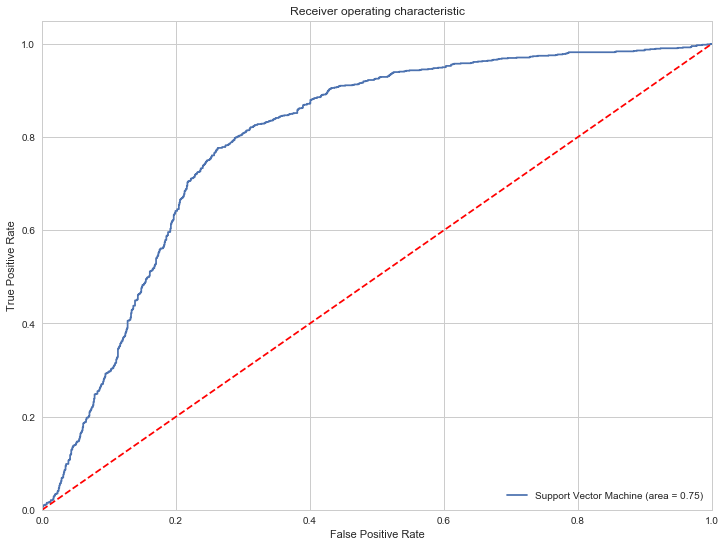

In [147]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ytest, model.predict(Xtest))
fpr, tpr, thresholds = roc_curve(ytest, model.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 7.1 SVM Hyper Parameters

#### C = Allows us to decide how much we want to penalize misclassified points.
#### Low C-Values = Will give us simplicity (soft margin) but it may misclassify some points or make mistakes.
#### High C-Values = Will try to not make any mistake but may suffer from overfitting.

#### gamma = which is the maximum number of features Random Forest is allowed to try in an individual tree; best is to go with the sqrt(features) as a default



## Conclusion

### Here are some of the algorithms we used and their Accuracy score

### 1> Logstic Regression - Accuracy - 78%
### 2> Descision Tree Classifier - Accuracy - 81 %
### 3> Random Forest Classifier - Accuracy - 83 %
### 4> Support Vector Machine Classifier - Accuracy - 75%